# Data Loading & Basic Understanding

## 1. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

## 2. Importing Dataset

In [3]:
df = pd.read_csv('GWProj.csv')

### 2.1. Checking basic information about the data

In [4]:
df.shape

(2061634, 33)

In [5]:
print(' We Have {} Columns : \n \n {}'.format(len(df.columns),df.columns.values))

 We Have 33 Columns : 
 
 ['Hospital Service Area' 'Hospital County' 'Operating Certificate Number'
 'Permanent Facility Id' 'Facility Name' 'Age Group' 'Zip Code - 3 digits'
 'Gender' 'Race' 'Ethnicity' 'Length of Stay' 'Type of Admission'
 'Patient Disposition' 'Discharge Year' 'CCSR Diagnosis Code'
 'CCSR Diagnosis Description' 'CCSR Procedure Code'
 'CCSR Procedure Description' 'APR DRG Code' 'APR DRG Description'
 'APR MDC Code' 'APR MDC Description' 'APR Severity of Illness Code'
 'APR Severity of Illness Description' 'APR Risk of Mortality'
 'APR Medical Surgical Description' 'Payment Typology 1'
 'Payment Typology 2' 'Payment Typology 3' 'Birth Weight'
 'Emergency Department Indicator' 'Total Charges' 'Total Costs']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061634 entries, 0 to 2061633
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

### 2.2. Checking null values, zero values and unqiue values for each feature

### For numerical variables

In [7]:
cat_cols = df.select_dtypes(include=['object', 'O']).columns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for feature in num_cols:
    zero_values = (df[feature] == 0).sum()
    null_values = df[feature].isnull().sum()
    unique_values = len(df[feature].unique())

    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("="*30)

Feature: Operating Certificate Number
Number of 0 Values: 0
Number of Null Values: 5823
Unique Values: 165
Feature: Permanent Facility Id
Number of 0 Values: 0
Number of Null Values: 5252
Unique Values: 202
Feature: Discharge Year
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 1
Feature: APR DRG Code
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 334
Feature: APR MDC Code
Number of 0 Values: 150
Number of Null Values: 0
Unique Values: 26
Feature: APR Severity of Illness Code
Number of 0 Values: 633
Number of Null Values: 0
Unique Values: 5


### For categorical variables

In [8]:
cat_cols = df.select_dtypes(include=['object', 'O']).columns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for feature in cat_cols:
    zero_values = (df[feature] == 0).sum()
    null_values = df[feature].isnull().sum()
    unique_values = len(df[feature].unique())

    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("="*30)

Feature: Hospital Service Area
Number of 0 Values: 0
Number of Null Values: 5252
Unique Values: 9
Feature: Hospital County
Number of 0 Values: 0
Number of Null Values: 5252
Unique Values: 57
Feature: Facility Name
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 201
Feature: Age Group
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 5
Feature: Zip Code - 3 digits
Number of 0 Values: 0
Number of Null Values: 40275
Unique Values: 51
Feature: Gender
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 3
Feature: Race
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 4
Feature: Ethnicity
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 4
Feature: Length of Stay
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 120
Feature: Type of Admission
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 6
Feature: Patient Disposition
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 19
Feature: CCSR Diagnosis

# Data Pre-Processing

## 3. Merging Procedure Code Information to categorize in broader categories

### 3.1 Importing Procedure code reference file downloaded from CCS goverment software

In [9]:
df_reference_ccs_pcode = pd.read_csv(r'GWAR_Reference_ccs_pcode.csv')

In [10]:
df_reference_ccs_pcode.columns

Index(['CCSR Category', 'CCSR Category Description', 'Clinical Domain',
       'ICD-10-PCS Root Operations', 'ICD-10-PCS Body Parts',
       'ICD-10-PCS Devices', 'ICD-10-PCS Approaches'],
      dtype='object')

In [11]:
df_reference_ccs_pcode.shape

(329, 7)

In [12]:
# Rename the column 'old_name' to 'new_name'
df_reference_ccs_pcode.rename(columns={'CCSR Category': 'CCSR Procedure Code'}, inplace=True)

In [13]:
df_reference_ccs_pcode.head(1)

,CCSR Procedure Code,CCSR Category Description,Clinical Domain,ICD-10-PCS Root Operations,ICD-10-PCS Body Parts,ICD-10-PCS Devices,ICD-10-PCS Approaches
0,ADM001,Transfusion of blood and blood products,Administration of Therapeutic Substances,Transfusion,"Peripheral Vein, Central Vein","Red Blood Cells, Platelets, Frozen Red Cells, ...","Percutaneous, Open"


### 3.2. Merging df and df_reference_ccs_pcode

In [14]:
# Merge the dataframes based on the common column 'A'
merged_df_a = pd.merge(df, df_reference_ccs_pcode, on='CCSR Procedure Code', how='left')

In [15]:
merged_df_a.shape

(2063594, 39)

In [16]:
merged_df_a.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'CCSR Category Description', 'Clinical Domain',
       'ICD-10-PCS Root Operations', 'ICD-10-PCS Body Parts',
       'ICD-10-PCS Devices', 'ICD-10-PCS Approaches'],
      dtype='ob

In [17]:
#ensure that the number of rows matches the left table
merged_df_a = merged_df_a.iloc[:len(df)]

In [18]:
merged_df_a.shape

(2061634, 39)

### 3.3 Populating df with Procedure code broader categories

In [19]:
# Fill the column 'B' in df1 with values from column 'C' in df2
df['CCSR New ProcCode Category'] = merged_df_a['Clinical Domain']

In [20]:
df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'CCSR New ProcCode Category'],
      dtype='object')

In [21]:
#df.head(1)

In [22]:
df.shape

(2061634, 34)

## 4. Mergring Diagnosis Code Information to categorize in broader categories

### 4.1 Importing Diagnosis code reference file downloaded from CCS goverment software

In [23]:
df_reference_ccs_dcode = pd.read_csv(r'GWAR_Reference_ccs_dcode.csv')

In [24]:
df_reference_ccs_dcode.shape

(1295, 2)

In [25]:
df_reference_ccs_dcode.columns

Index(['CCSR Category', 'Rationale for Default Assignment'], dtype='object')

In [26]:
# Rename the column 'old_name' to 'new_name'
df_reference_ccs_dcode.rename(columns={'CCSR Category': 'CCSR Diagnosis Code'}, inplace=True)

### 4.2. Merging df and df_reference_ccs_dcode

In [27]:
# Merge the dataframes based on the common column 'A'
merged_df_b = pd.merge(df, df_reference_ccs_dcode, on='CCSR Diagnosis Code', how='left')

In [28]:
merged_df_b.shape

(5826425, 35)

In [29]:
merged_df_b.head(1)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,CCSR New ProcCode Category,Rationale for Default Assignment
0,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,107,F,White,Not Span/Hispanic,...,Medical,Medicaid,NaN,NaN,NaN,Y,"51,514.62","7,552.54",Administration of Therapeutic Substances,99 Unacceptable PDX


### 4.3 Populating df with Diagnosis code broader categories

In [30]:
#ensure that the number of rows matches the left table
merged_df_b = merged_df_b.iloc[:len(df)]

In [31]:
# Fill the column 'B' in df1 with values from column 'C' in df2
df['CCSR New DiagCode Category'] = merged_df_b['Rationale for Default Assignment']

In [32]:
merged_df_b.shape

(2061634, 35)

In [33]:
#df.head(1)

## 5. Intial Exploratory Data Analysis Before Imputations, Drop and Replacements

### 5.1 Distribution of Patients by Age Group

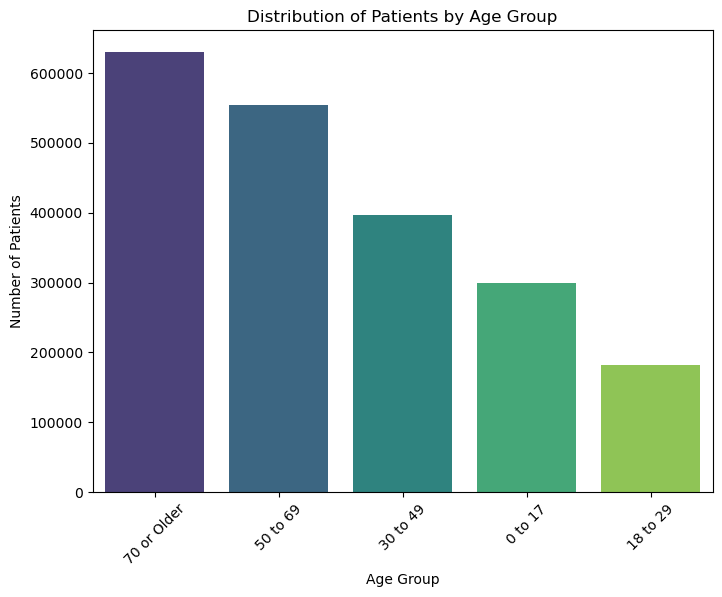

In [34]:
# Count the frequency of each age group
age_group_counts = df['Age Group'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Distribution of Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### 5.2. Distribution of Patients by Age Group and Type of Admission

<Figure size 1000x600 with 0 Axes>

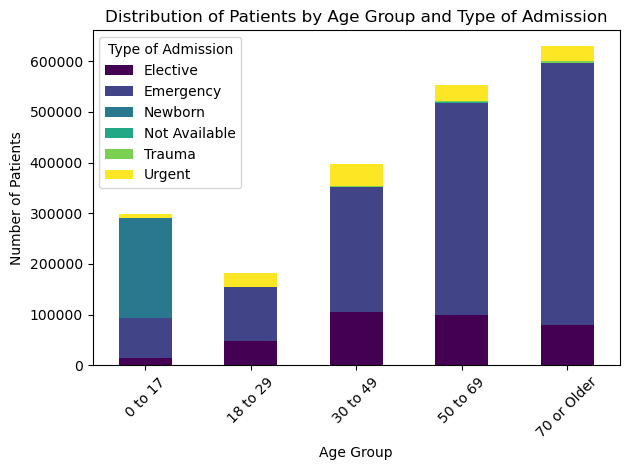

In [35]:
# Count the frequency of each combination of age group and type of admission
age_admission_counts = df.groupby(['Age Group', 'Type of Admission']).size().unstack(fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
age_admission_counts.plot(kind='bar', stacked=True, cmap='viridis')  # Create the stacked bar plot
plt.title('Distribution of Patients by Age Group and Type of Admission')  # Add a title to the plot
plt.xlabel('Age Group')  # Label the x-axis
plt.ylabel('Number of Patients')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Type of Admission')  # Add legend with title
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

### 5.3. Contingency tables (percentage & count) for type of admission vs Age Group

In [36]:
# Create a contingency table
contingency_table = pd.crosstab(index=df['Age Group'], columns=df['Type of Admission'], margins=True)

# Calculate percentages
percentage_table = (contingency_table / contingency_table.loc['All']) * 100

# Display the contingency table with percentages
percentage_table

Type of Admission,Elective,Emergency,Newborn,Not Available,Trauma,Urgent,All
Age Group,,,,,,,
0 to 17,3.950472,5.862900,99.973982,3.421053,4.046084,6.183321,14.506115
18 to 29,13.925551,7.708353,0.005102,12.456140,12.014813,19.344018,8.843034
30 to 49,30.316770,18.026545,0.009693,23.859649,18.886298,30.478868,19.240127
50 to 69,28.989393,30.585019,0.006122,29.385965,24.605678,23.156312,26.871549
70 or Older,22.817815,37.817183,0.005102,30.877193,40.447127,20.837480,30.539174
All,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [37]:
# Create a contingency table
contingency_table = pd.crosstab(index=df['Age Group'], columns=df['Type of Admission'], margins=True)

# Display the contingency table
contingency_table

Type of Admission,Elective,Emergency,Newborn,Not Available,Trauma,Urgent,All
Age Group,,,,,,,
0 to 17,13601,80275,195968,39,295,8885,299063
18 to 29,47944,105543,10,142,876,27796,182311
30 to 49,104377,246820,19,272,1377,43796,396661
50 to 69,99807,418771,12,335,1794,33274,553993
70 or Older,78559,517794,10,352,2949,29942,629606
All,344288,1369203,196019,1140,7291,143693,2061634


### 5.4. Distribution of Patients by Gender

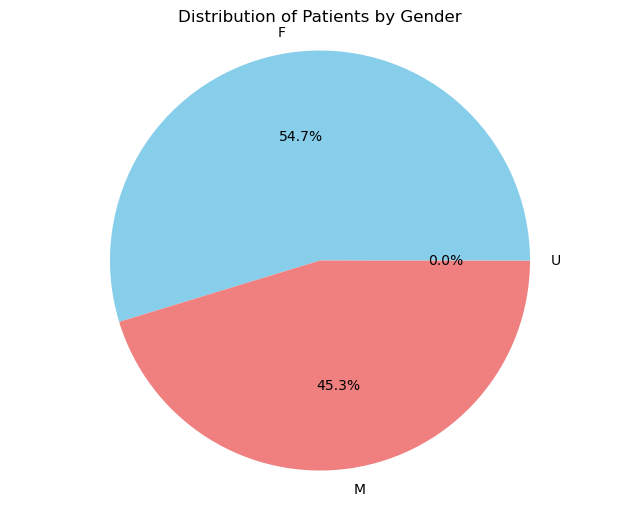

In [38]:
# Count the frequency of each gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Patients by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [39]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
F    1128109
M     933274
U        251
Name: count, dtype: int64

### 5.5. Payment Typology 1 Distribution

In [40]:
Payment_Typology = df['Payment Typology 1'].value_counts()
Payment_Typology

Payment Typology 1
Medicare                     822802
Medicaid                     642115
Private Health Insurance     295882
Blue Cross/Blue Shield       209373
Self-Pay                      26028
Miscellaneous/Other           22786
Managed Care, Unspecified     21624
Federal/State/Local/VA        19822
Department of Corrections      1202
Name: count, dtype: int64

### 5.6. Payment Typology 2 Distribution

In [41]:
Payment_Typology_2 = df['Payment Typology 2'].value_counts()
Payment_Typology_2

Payment Typology 2
Medicaid                     402326
Medicare                     170832
Self-Pay                     142051
Private Health Insurance     133792
Blue Cross/Blue Shield        97252
Federal/State/Local/VA        11693
Miscellaneous/Other            8749
Managed Care, Unspecified      2573
Department of Corrections       107
Name: count, dtype: int64

### 5.7. Distribution of Patients by Emergency Department Indicator

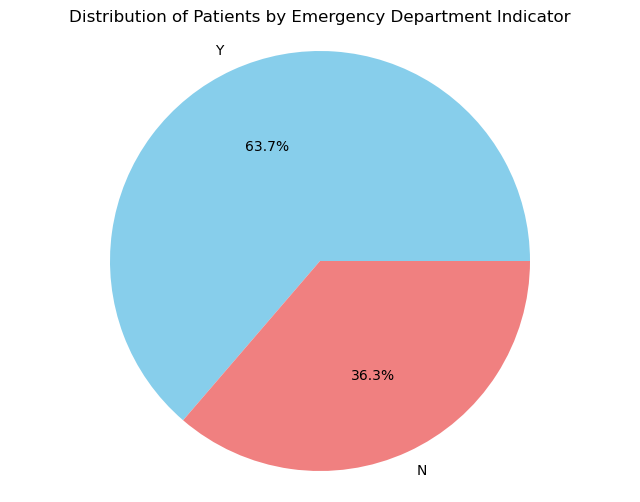

In [42]:
# Count the frequency of each Emergency Department Indicator
gender_counts = df['Emergency Department Indicator'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Patients by Emergency Department Indicator')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [43]:
EDC = df['Emergency Department Indicator'].value_counts()
EDC

Emergency Department Indicator
Y    1313279
N     748355
Name: count, dtype: int64

### 5.8. Distribution of Patients by Length of Stay

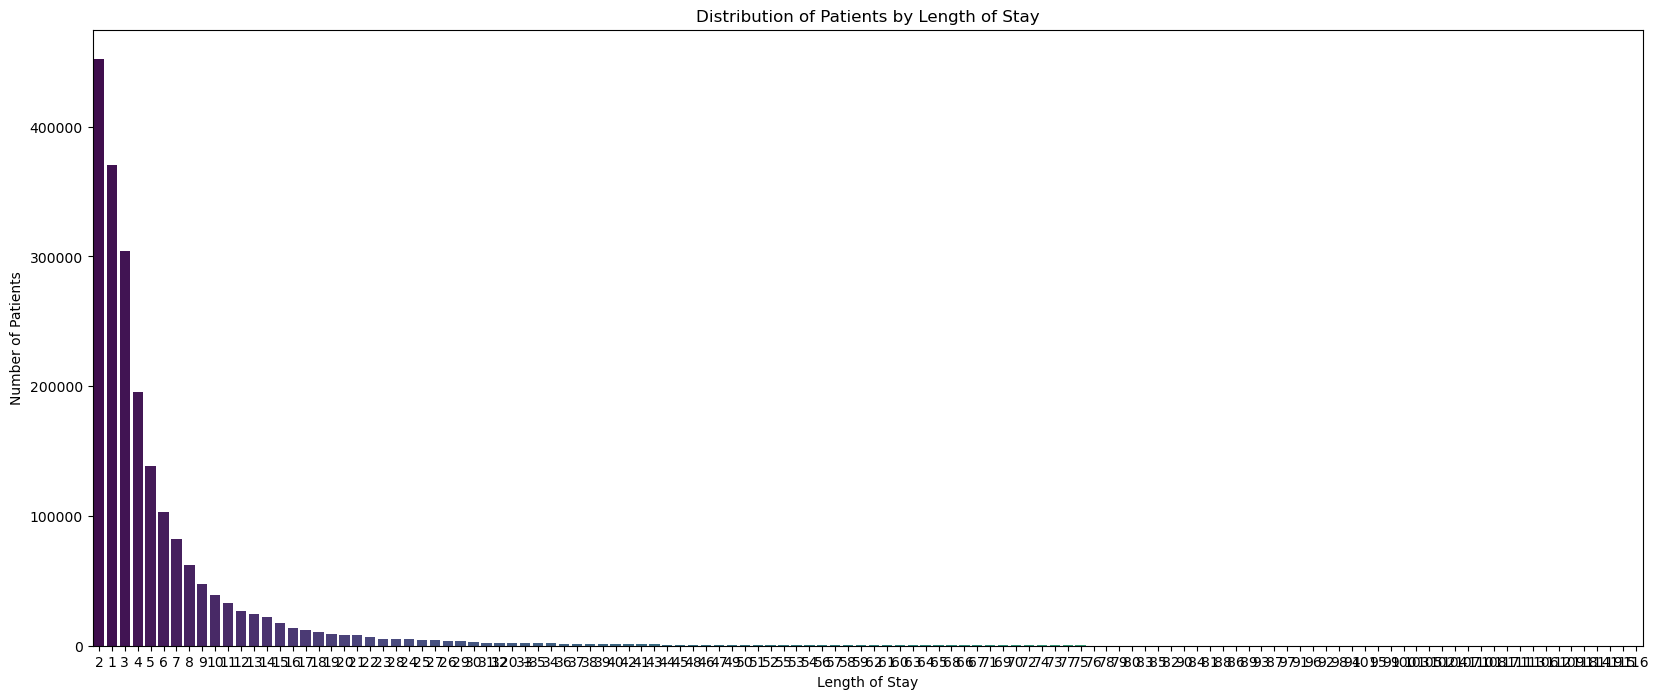

In [44]:
# Count the frequency of each Length of stay
length_of_stay_counts = df['Length of Stay'].value_counts()

# Create a bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x=length_of_stay_counts.index, y=length_of_stay_counts.values, palette='viridis')
plt.title('Distribution of Patients by Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [45]:
# Set option to display all rows
pd.set_option('display.max_rows', None)

# Calculate the value counts
length_of_stay = df['Length of Stay'].value_counts()

# Print the result
print(length_of_stay)

Length of Stay
2        452139
1        370262
3        304568
4        195647
5        138309
6        103428
7         81961
8         62240
9         47745
10        39132
11        32543
12        26782
13        24153
14        22345
15        17478
16        13951
17        12037
18        10220
19         9117
20         8437
21         8416
22         6710
23         5563
28         5234
24         4910
25         4403
27         4049
26         4015
29         3258
30         2699
31         2343
32         2179
120 +      2086
33         1957
35         1896
34         1863
36         1598
37         1448
38         1299
39         1226
40         1172
42         1152
41         1109
43         1026
44          894
45          790
48          785
46          757
47          711
49          657
50          621
51          537
52          514
55          510
53          503
54          466
56          458
57          425
58          419
59          355
62          349
61       

## 6. Missing Data Handling

### 6.1 Checking unique values for each feature

In [46]:
for col in df.select_dtypes('O').columns:
    print('We Have {} Unique Values. Values in {} Column : {}'.format(len(df[col].unique()),col,df[col].unique()))
    print('__'*30)

We Have 9 Unique Values. Values in Hospital Service Area Column : ['New York City' 'Hudson Valley' nan 'Long Island' 'Capital/Adirond'
 'Central NY' 'Finger Lakes' 'Western NY' 'Southern Tier']
____________________________________________________________
We Have 57 Unique Values. Values in Hospital County Column : ['Bronx' 'Rockland' nan 'Manhattan' 'Westchester' 'Kings' 'Queens'
 'Orange' 'Nassau' 'Sullivan' 'Otsego' 'Herkimer' 'Delaware' 'Monroe'
 'Ontario' 'Cortland' 'Columbia' 'Albany' 'Suffolk' 'Onondaga' 'Madison'
 'Steuben' 'Cayuga' 'Montgomery' 'Erie' 'Jefferson' 'Oswego' 'Yates'
 'Wayne' 'Genesee' 'Schoharie' 'Ulster' 'Oneida' 'Schenectady' 'Broome'
 'St Lawrence' 'Schuyler' 'Richmond' 'Niagara' 'Chemung' 'Essex'
 'Chautauqua' 'Dutchess' 'Putnam' 'Chenango' 'Tompkins' 'Warren' 'Fulton'
 'Wyoming' 'Franklin' 'Cattaraugus' 'Saratoga' 'Lewis' 'Livingston'
 'Allegany' 'Orleans' 'Clinton']
____________________________________________________________
We Have 201 Unique Values. Value

We Have 51 Unique Values. Values in Zip Code - 3 digits Column : ['107' '104' '100' '113' '125' '109' nan '108' '105' 'OOS' '111' '117'
 '114' '115' '112' '106' '103' '101' '116' '110' '127' '119' '126' '118'
 '128' '133' '121' '124' '120' '123' '130' '137' '136' '134' '138' '149'
 '131' '135' '144' '146' '145' '148' '140' '147' '141' '142' '129' '132'
 '143' '139' '122']
____________________________________________________________
We Have 3 Unique Values. Values in Gender Column : ['F' 'M' 'U']
____________________________________________________________
We Have 4 Unique Values. Values in Race Column : ['White' 'Black/African American' 'Other Race' 'Multi-racial']
____________________________________________________________
We Have 4 Unique Values. Values in Ethnicity Column : ['Not Span/Hispanic' 'Spanish/Hispanic' 'Unknown' 'Multi-ethnic']
____________________________________________________________
We Have 120 Unique Values. Values in Length of Stay Column : ['3' '1' '2' '4' '6' '1

We Have 322 Unique Values. Values in CCSR Procedure Description Column : ['POTENTIAL COVID-19 THERAPIES' 'ADMINISTRATION OF ANTIBIOTICS'
 'SPONTANEOUS VAGINAL DELIVERY'
 'PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING SUBSTANCE USE)'
 'ISOLATION PROCEDURES' nan
 'ADMINISTRATION OF NUTRITIONAL AND ELECTROLYTIC SUBSTANCES'
 'ADMINISTRATION OF THERAPEUTIC SUBSTANCES, NEC'
 'ADMINISTRATION OF ANTI-INFLAMMATORY AGENTS'
 'GI SYSTEM ENDOSCOPY WITHOUT BIOPSY (DIAGNOSTIC)'
 'COUNSELING FOR SUBSTANCE USE'
 'PACEMAKER AND DEFIBRILLATOR INTERROGATION' 'FETAL HEART RATE MONITORING'
 'INGUINAL AND FEMORAL HERNIA REPAIR' 'NON-INVASIVE VENTILATION'
 'SKIN LACERATION REPAIR (EXCLUDING PERINEUM)'
 'TRANSFUSION OF BLOOD AND BLOOD PRODUCTS' 'VACCINATIONS'
 'OTHER PERITONEAL CAVITY PROCEDURES' 'CESAREAN SECTION'
 'OTHER CARDIOVASCULAR SYSTEM MEASUREMENT AND MONITORING'
 'ASSISTED VAGINAL DELIVERY' 'HEMODIALYSIS'
 'BLADDER CATHETERIZATION AND DRAINAGE' 'ULTRASONOGRAPHY'
 'COVID-19 VACCINATIONS' 'INTRAVENOUS I

We Have 334 Unique Values. Values in APR DRG Description Column : ['MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS'
 'CELLULITIS AND OTHER SKIN INFECTIONS' 'VAGINAL DELIVERY' 'SCHIZOPHRENIA'
 'BRONCHIOLITIS AND RSV PNEUMONIA'
 'EYE INFECTIONS AND OTHER EYE DISORDERS' 'ACUTE KIDNEY INJURY'
 'OTHER DIGESTIVE SYSTEM DIAGNOSES' 'OTHER DISORDERS OF NERVOUS SYSTEM'
 'HYPERTENSION' 'SEIZURE' 'MAJOR ESOPHAGEAL DISORDERS'
 'ALCOHOL AND DRUG DEPENDENCE WITH REHABILITATION AND/OR DETOXIFICATION THERAPY'
 'OTHER GASTROENTERITIS, NAUSEA AND VOMITING' 'ASTHMA'
 'ALCOHOL ABUSE AND DEPENDENCE' 'ANTEPARTUM WITHOUT O.R. PROCEDURE'
 'INGUINAL, FEMORAL AND UMBILICAL HERNIA PROCEDURES'
 'PEPTIC ULCER AND GASTRITIS' 'HEART FAILURE'
 'DISORDERS OF PANCREAS EXCEPT MALIGNANCY'
 'SEPTICEMIA AND DISSEMINATED INFECTIONS'
 'DRUG AND ALCOHOL ABUSE OR DEPENDENCE, LEFT AGAINST MEDICAL ADVICE'
 'NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWBORN OR NEONATE WITH OTHER PROBLEM'
 'OTHER BACK AND NECK DISORDERS, FRACTURES 

We Have 26 Unique Values. Values in APR MDC Description Column : ['DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM'
 'DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEOUS TISSUE AND BREAST'
 'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM'
 'MENTAL DISEASES AND DISORDERS' 'DISEASES AND DISORDERS OF THE EYE'
 'DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT'
 'DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM'
 'DISEASES AND DISORDERS OF THE NERVOUS SYSTEM'
 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM'
 'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS'
 'DISEASES AND DISORDERS OF THE HEPATOBILIARY SYSTEM AND PANCREAS'
 'INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)'
 'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD'
 'DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE'
 'DISEASES AND DISORDERS OF THE BLOOD AND BLOOD FORMING ORGANS AND IMMUNOLOGICAL DISORDERS'
 'ENDOCRINE, NUTRITIONAL AND META

In [47]:
# unique_values = []
# for col in object_cols:
#   unique_values.append(df[col].unique().size)
# plt.figure(figsize=(18,6))
# plt.title('No. Unique values of Categorical Features')
# plt.xticks(rotation=90)
# sns.barplot(x=object_cols,y=unique_values)

### 6.2. Missing Values Count & Percentage

In [48]:
df.isnull().sum()

Hospital Service Area                     5252
Hospital County                           5252
Operating Certificate Number              5823
Permanent Facility Id                     5252
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      40275
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCSR Diagnosis Code                          0
CCSR Diagnosis Description                   0
CCSR Procedure Code                     567963
CCSR Procedure Description              567963
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [49]:
null_df_data = round(100*(df.isnull().sum().sort_values(ascending=False)/len(df.index)),2).to_frame().rename(columns={0:'df Null values percentage'})[:33]
print(null_df_data)

                                     df Null values percentage
Birth Weight                                             90.02
Payment Typology 3                                       85.99
Payment Typology 2                                       52.98
CCSR Procedure Description                               27.55
CCSR Procedure Code                                      27.55
CCSR New ProcCode Category                               27.53
Zip Code - 3 digits                                       1.95
Operating Certificate Number                              0.28
Hospital County                                           0.25
Hospital Service Area                                     0.25
Permanent Facility Id                                     0.25
Total Costs                                               0.21
APR Severity of Illness Description                       0.03
APR Risk of Mortality                                     0.03
Length of Stay                                         

In [50]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df.dtypes == 'int')
num_cols = list(s[s].index)
print("Integer variables:")
print(num_cols)

s = (df.dtypes == 'float')
num_cols = list(s[s].index)
print("Real variables:")
print(num_cols)

Categorical variables:
['Hospital Service Area', 'Hospital County', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission', 'Patient Disposition', 'CCSR Diagnosis Code', 'CCSR Diagnosis Description', 'CCSR Procedure Code', 'CCSR Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3', 'Birth Weight', 'Emergency Department Indicator', 'Total Charges', 'Total Costs', 'CCSR New ProcCode Category', 'CCSR New DiagCode Category']
Integer variables:
[]
Real variables:
['Operating Certificate Number', 'Permanent Facility Id']


### Note:
Data set is in raw format and cannot be directly used to build the model, so the data
set needs to be cleaned and processed to provide an input to the model. Birthweight
column has more than 90% of the data missing and “Payment typology 3” has 86% of
the data missing, imputing for such large missing values might end up with large
error terms, so these two features have been dropped. The “discharge year” column
that shows in which year a patient is discharged, has the value “2022” throughout the
dataset, as this data set is about patient discharges in the year 2022, so this column is
dropped. 

## 6.3. Data Transformations

In [51]:
data = df

In [52]:
#data.head(1)

### 6.3.1. Removing columns Payment Typology 3, 'Birth Weight, Discharge Year

In [53]:
data.drop(columns=['Payment Typology 3', 'Birth Weight', 'Discharge Year'], inplace=True)

In [54]:
#data.head(1)

### 6.3.2. Replacing all NA values in columns Payment Typology 2 to Not Applicable

In [55]:
data['Payment Typology 2'] = data['Payment Typology 2'].fillna('Not Applicable')

In [56]:
#data.head(1)

### 6.3.3. Replacing all 'Length of Stay" values greater than 120 to "130" signifying large number

In [57]:
# Replace "120+" with 130 in the 'Length of Stay' column
data['Length of Stay'] = data['Length of Stay'].replace('120 +', 130)

# Convert the 'Length of Stay' column to numeric type
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'])

In [58]:
# Set option to display all rows
pd.set_option('display.max_rows', None)

# Calculate the value counts
length_of_stay = data['Length of Stay'].value_counts()

# Print the result
print(length_of_stay)

Length of Stay
2      452139
1      370262
3      304568
4      195647
5      138309
6      103428
7       81961
8       62240
9       47745
10      39132
11      32543
12      26782
13      24153
14      22345
15      17478
16      13951
17      12037
18      10220
19       9117
20       8437
21       8416
22       6710
23       5563
28       5234
24       4910
25       4403
27       4049
26       4015
29       3258
30       2699
31       2343
32       2179
130      2086
33       1957
35       1896
34       1863
36       1598
37       1448
38       1299
39       1226
40       1172
42       1152
41       1109
43       1026
44        894
45        790
48        785
46        757
47        711
49        657
50        621
51        537
52        514
55        510
53        503
54        466
56        458
57        425
58        419
59        355
62        349
61        341
60        339
63        328
64        291
65        265
68        244
66        242
67        233
71        231
69   

### 6.3.4. Checking missing percentage and dropping rows with NA for coloumns having missing percenatage < 1%

In [59]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100

In [60]:
missing_percentage

Hospital Service Area                   0.254749
Hospital County                         0.254749
Operating Certificate Number            0.282446
Permanent Facility Id                   0.254749
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     1.953548
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.000000
CCSR Diagnosis Code                     0.000000
CCSR Diagnosis Description              0.000000
CCSR Procedure Code                    27.549167
CCSR Procedure Description             27.549167
APR DRG Code                            0.000000
APR DRG Description                     0.000000
APR MDC Code                            0.000000
APR MDC Description 

In [61]:
# Identify columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage < 1].index.tolist()

# Drop rows with missing values from columns with missing values
data.dropna(subset=columns_with_missing_values, inplace=True)

In [62]:
data.shape

(2050956, 32)

In [63]:
#data.head(1)

### 6.3.5. Encoding/Mapping Age Group into numerical categories

In [64]:
# Before mapping
print("Before mapping:")
print(data['Age Group'].unique())

Before mapping:
['50 to 69' '18 to 29' '0 to 17' '70 or Older' '30 to 49']


In [65]:
def map_age_group(age_group):
    if age_group == '0 to 17':
        return 1
    elif age_group == '18 to 29':
        return 2
    elif age_group == '30 to 49':
        return 3
    elif age_group == '50 to 69':
        return 4
    elif age_group == '70 or Older':
        return 5
    # You can add more conditions for other age groups if needed
    else:
        return age_group  # If age_group doesn't match any of the specified ranges, return it as it is

In [66]:
# Apply the mapping function to the 'Age Group' column
data['Age Group'] = data['Age Group'].map(map_age_group)

In [67]:
# After mapping
print("\nAfter mapping:")
print(data['Age Group'].unique())


After mapping:
[4 2 1 5 3]


In [68]:
#data.head(1)

### 6.3.6. Dropping Repetative information columns or columns already categorized to broader categories

In [69]:
data.drop(columns=['CCSR Diagnosis Code', 'CCSR Diagnosis Description', 'CCSR Procedure Code',
                  'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
                   'APR MDC Description', 'APR Severity of Illness Description'], inplace=True)

In [70]:
data.shape

(2050956, 24)

In [71]:
data.drop(columns=['Hospital Service Area', 'Operating Certificate Number', 'Permanent Facility Id',
                  'Facility Name', ], inplace=True)

In [72]:
data.shape

(2050956, 20)

In [73]:
data.columns

Index(['Hospital County', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'APR MDC Code', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'CCSR New ProcCode Category', 'CCSR New DiagCode Category'],
      dtype='object')

### 6.3.7. Encoding/Mapping Emergency Department Indicator

In [74]:
#Before Mapping Emergency Department Indicator
unique_values_multiple = data[['Emergency Department Indicator']].apply(lambda x: x.unique())
print("Unique values of multiple columns:\n", unique_values_multiple)

Unique values of multiple columns:
   Emergency Department Indicator
0                              Y
1                              N


In [75]:
#encoding column "Emergency Department Indicator" 
# Map 'Y' to 1 and 'N' to 0 in the specified column
data['Emergency Department Indicator'] = data['Emergency Department Indicator'].map({'Y': 1, 'N': 0})

In [76]:
unique_values_multiple = data[['Emergency Department Indicator']].apply(lambda x: x.unique())
print("Unique values of multiple columns:\n", unique_values_multiple)

Unique values of multiple columns:
    Emergency Department Indicator
0                               1
1                               0


### 6.3.8. Encoding/Mapping APR Risk of Mortality

In [77]:
#Before Mapping APR Risk of Mortality
unique_values_multiple = data[['APR Risk of Mortality']].apply(lambda x: x.unique())
print("Unique values of multiple columns:\n", unique_values_multiple)

Unique values of multiple columns:
   APR Risk of Mortality
0                 Major
1                 Minor
2              Moderate
3               Extreme


In [78]:
# Define mapping of risk levels to numerical values
risk_mapping = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}

# Map risk levels to numerical values in the specified column
data['APR Risk of Mortality'] = data['APR Risk of Mortality'].map(risk_mapping)

In [79]:
#After Mapping APR Risk of Mortality
unique_values_multiple = data[['APR Risk of Mortality']].apply(lambda x: x.unique())
print("Unique values of multiple columns:\n", unique_values_multiple)

Unique values of multiple columns:
    APR Risk of Mortality
0                      3
1                      1
2                      2
3                      4


### 6.3.9 Encoding/Mapping Gender

In [80]:
#Before Mapping Gender
unique_values_multiple = data[['Gender']].apply(lambda x: x.unique())
print("Unique values of multiple columns:\n", unique_values_multiple)

Unique values of multiple columns:
   Gender
0      F
1      M
2      U


In [81]:
#encoding column "gender" 
# Map 'F' to 2 and 'M' to 2 and 'U' to '0' in the specified column
data['Gender'] = data['Gender'].map({'F': 2, 'M': 1, 'U': 0})

In [82]:
#After Mapping Gender
unique_values_multiple = data[['Gender']].apply(lambda x: x.unique())
print("Unique values of multiple columns:\n", unique_values_multiple)

Unique values of multiple columns:
    Gender
0       2
1       1
2       0


In [83]:
data.columns

Index(['Hospital County', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'APR MDC Code', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'CCSR New ProcCode Category', 'CCSR New DiagCode Category'],
      dtype='object')

### 6.3.10. Changing data types of columns which has numeric values from object to int/float 

In [84]:
print(data.dtypes)

Hospital County                     object
Age Group                            int64
Zip Code - 3 digits                 object
Gender                               int64
Race                                object
Ethnicity                           object
Length of Stay                       int64
Type of Admission                   object
Patient Disposition                 object
APR MDC Code                         int64
APR Severity of Illness Code         int64
APR Risk of Mortality                int64
APR Medical Surgical Description    object
Payment Typology 1                  object
Payment Typology 2                  object
Emergency Department Indicator       int64
Total Charges                       object
Total Costs                         object
CCSR New ProcCode Category          object
CCSR New DiagCode Category          object
dtype: object


In [85]:
# Columns to fill null values with 0
columns_to_fill_na = ['Zip Code - 3 digits', 'Total Costs', 'Total Charges']

# Replace null values with 0 in the specified columns
df[columns_to_fill_na] = df[columns_to_fill_na].fillna(0)

# Convert 'Zip Code - 3 digits' column to numeric after replacing non-numeric values with NaN
df['Zip Code - 3 digits'] = pd.to_numeric(df['Zip Code - 3 digits'], errors='coerce').fillna(0).astype(int)

# Remove commas from numeric values before converting to floats
for col in ['Total Costs', 'Total Charges']:
    df[col] = df[col].str.replace(',', '')

# Convert multiple columns from object to float
columns_to_convert_to_float = ['Total Costs','Total Charges']
data[columns_to_convert_to_float] = data[columns_to_convert_to_float].astype(float)

In [86]:
print(data.dtypes)

Hospital County                      object
Age Group                             int64
Zip Code - 3 digits                   int32
Gender                                int64
Race                                 object
Ethnicity                            object
Length of Stay                        int64
Type of Admission                    object
Patient Disposition                  object
APR MDC Code                          int64
APR Severity of Illness Code          int64
APR Risk of Mortality                 int64
APR Medical Surgical Description     object
Payment Typology 1                   object
Payment Typology 2                   object
Emergency Department Indicator        int64
Total Charges                       float64
Total Costs                         float64
CCSR New ProcCode Category           object
CCSR New DiagCode Category           object
dtype: object


# Exploratory Data Analysis after Transformations

## 7. Exploratory data analysis

### 7.1 Outlier Handling

In [95]:
# Identify Outliers

# Calculate the interquartile range (IQR) for Total Charges
q1_charges = data['Total Charges'].quantile(0.25)
q3_charges = data['Total Charges'].quantile(0.75)
iqr_charges = q3_charges - q1_charges

# Calculate the interquartile range (IQR) for Total Costs
q1_costs = data['Total Costs'].quantile(0.25)
q3_costs = data['Total Costs'].quantile(0.75)
iqr_costs = q3_costs - q1_costs

# Calculate lower and upper bounds for Total Charges
lower_bound_charges = q1_charges - 1.5 * iqr_charges
upper_bound_charges = q3_charges + 1.5 * iqr_charges

# Calculate lower and upper bounds for Total Costs
lower_bound_costs = q1_costs - 1.5 * iqr_costs
upper_bound_costs = q3_costs + 1.5 * iqr_costs

# Count outliers in Total Charges
outliers_charges = data[(data['Total Charges'] < lower_bound_charges) | (data['Total Charges'] > upper_bound_charges)]
num_outliers_charges = outliers_charges.shape[0]

# Count outliers in Total Costs
outliers_costs = data[(data['Total Costs'] < lower_bound_costs) | (data['Total Costs'] > upper_bound_costs)]
num_outliers_costs = outliers_costs.shape[0]

print("Total Charges outliers:", num_outliers_charges)
print("Total Costs outliers:", num_outliers_costs)

Total Charges outliers: 184033
Total Costs outliers: 179906


In [96]:
# Calculate the interquartile range (IQR) and bounds for Total Charges
q1_charges = data['Total Charges'].quantile(0.25)
q3_charges = data['Total Charges'].quantile(0.75)
iqr_charges = q3_charges - q1_charges
lower_bound_charges_normal = q1_charges - 1.5 * iqr_charges
upper_bound_charges_normal = q3_charges + 1.5 * iqr_charges
lower_bound_charges_extreme = q1_charges - 3 * iqr_charges
upper_bound_charges_extreme = q3_charges + 3 * iqr_charges

# Calculate the interquartile range (IQR) and bounds for Total Costs
q1_costs = data['Total Costs'].quantile(0.25)
q3_costs = data['Total Costs'].quantile(0.75)
iqr_costs = q3_costs - q1_costs
lower_bound_costs_normal = q1_costs - 1.5 * iqr_costs
upper_bound_costs_normal = q3_costs + 1.5 * iqr_costs
lower_bound_costs_extreme = q1_costs - 3 * iqr_costs
upper_bound_costs_extreme = q3_costs + 3 * iqr_costs

# Count extreme outliers and normal outliers for Total Charges
extreme_outliers_charges = data[(data['Total Charges'] < lower_bound_charges_extreme) | (data['Total Charges'] > upper_bound_charges_extreme)]
normal_outliers_charges = data[(data['Total Charges'] < lower_bound_charges_normal) | (data['Total Charges'] > upper_bound_charges_normal) & ~(data['Total Charges'] < lower_bound_charges_extreme) & ~(data['Total Charges'] > upper_bound_charges_extreme)]
num_extreme_outliers_charges = extreme_outliers_charges.shape[0]
num_normal_outliers_charges = normal_outliers_charges.shape[0]

# Count extreme outliers and normal outliers for Total Costs
extreme_outliers_costs = data[(data['Total Costs'] < lower_bound_costs_extreme) | (data['Total Costs'] > upper_bound_costs_extreme)]
normal_outliers_costs = data[(data['Total Costs'] < lower_bound_costs_normal) | (data['Total Costs'] > upper_bound_costs_normal) & ~(data['Total Costs'] < lower_bound_costs_extreme) & ~(data['Total Costs'] > upper_bound_costs_extreme)]
num_extreme_outliers_costs = extreme_outliers_costs.shape[0]
num_normal_outliers_costs = normal_outliers_costs.shape[0]

print("Total Charges extreme outliers:", num_extreme_outliers_charges)
print("Total Charges normal outliers:", num_normal_outliers_charges)
print("Total Costs extreme outliers:", num_extreme_outliers_costs)
print("Total Costs normal outliers:", num_normal_outliers_costs)

Total Charges extreme outliers: 91990
Total Charges normal outliers: 92043
Total Costs extreme outliers: 89813
Total Costs normal outliers: 90093


In [97]:
# Calculate the total number of rows in the data
total_rows = len(data)

# Calculate the percentage of extreme outliers and normal outliers for Total Charges
percent_extreme_outliers_charges = (num_extreme_outliers_charges / total_rows) * 100
percent_normal_outliers_charges = (num_normal_outliers_charges / total_rows) * 100

# Calculate the percentage of extreme outliers and normal outliers for Total Costs
percent_extreme_outliers_costs = (num_extreme_outliers_costs / total_rows) * 100
percent_normal_outliers_costs = (num_normal_outliers_costs / total_rows) * 100

print("Total Charges extreme outliers:", num_extreme_outliers_charges, "(", percent_extreme_outliers_charges, "% )")
print("Total Charges normal outliers:", num_normal_outliers_charges, "(", percent_normal_outliers_charges, "% )")
print("Total Costs extreme outliers:", num_extreme_outliers_costs, "(", percent_extreme_outliers_costs, "% )")
print("Total Costs normal outliers:", num_normal_outliers_costs, "(", percent_normal_outliers_costs, "% )")

Total Charges extreme outliers: 91990 ( 4.485225426581555 % )
Total Charges normal outliers: 92043 ( 4.487809587333906 % )
Total Costs extreme outliers: 89813 ( 4.379079804734962 % )
Total Costs normal outliers: 90093 ( 4.392731974747386 % )


In [98]:
data.shape

(2050956, 20)

In [99]:
# Remove rows corresponding to extreme outliers for Total Charges
data = data[(data['Total Charges'] >= lower_bound_charges_extreme) & (data['Total Charges'] <= upper_bound_charges_extreme)]
data = data[(data['Total Charges'] >= lower_bound_charges_normal) & (data['Total Charges'] <= upper_bound_charges_normal)]

In [100]:
data.shape

(1866923, 20)

In [101]:
# Remove rows corresponding to normal outliers for Total Costs
data = data[(data['Total Costs'] >= lower_bound_costs_extreme) & (data['Total Costs'] <= upper_bound_costs_extreme)]
data = data[(data['Total Costs'] >= lower_bound_costs_normal) & (data['Total Costs'] <= upper_bound_costs_normal)]

In [102]:
data.shape

(1817493, 20)

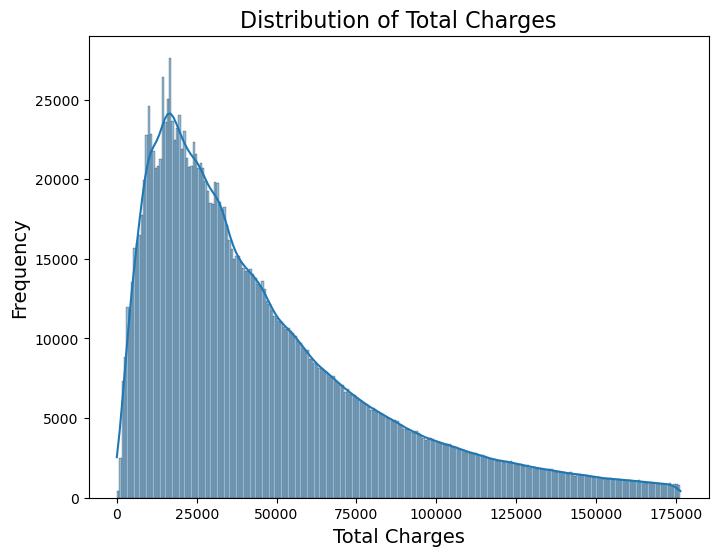

In [103]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram for Total Charges
sns.histplot(data['Total Charges'], kde=True, ax=ax)

# Add labels and title
ax.set_xlabel('Total Charges', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of Total Charges', fontsize=16)

# Show the plot
plt.show()

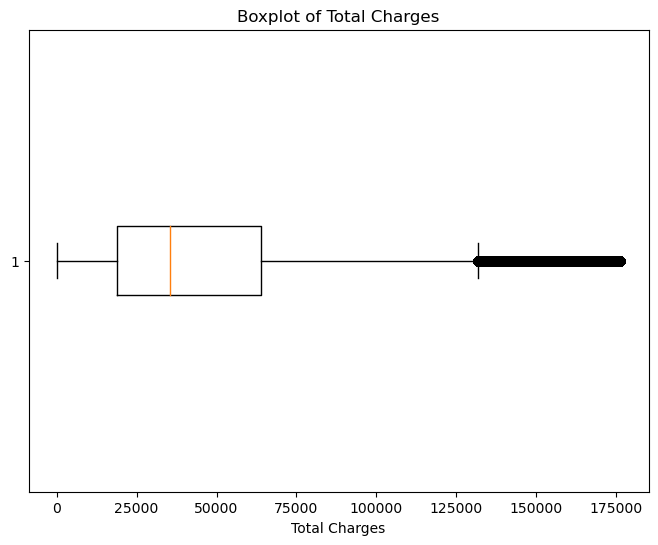

In [104]:
total_charges_data = data['Total Charges']

plt.figure(figsize=(8, 6))
plt.boxplot(total_charges_data, vert=False)  # vert=False to plot horizontally
plt.title('Boxplot of Total Charges')
plt.xlabel('Total Charges')
plt.show()

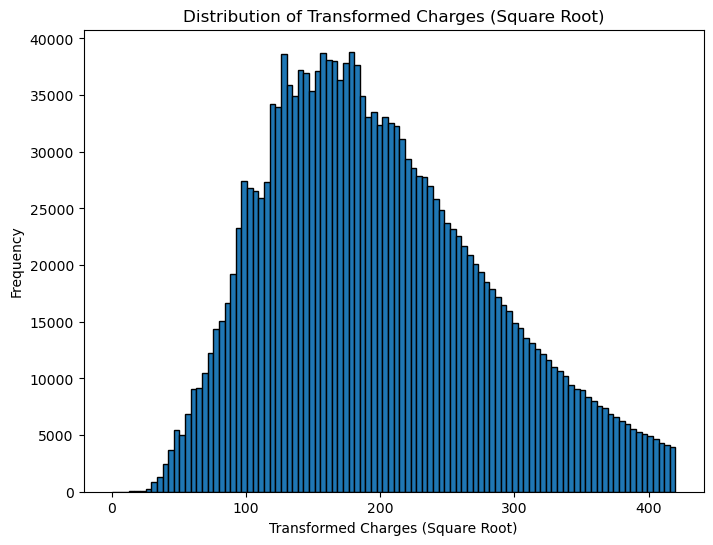

In [105]:
# Apply the square root transformation
data['Transformed_Charges'] = np.sqrt(data['Total Charges'])

# Plot the transformed distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Transformed_Charges'], bins=100, edgecolor='black')
plt.xlabel('Transformed Charges (Square Root)')
plt.ylabel('Frequency')
plt.title('Distribution of Transformed Charges (Square Root)')
plt.show()

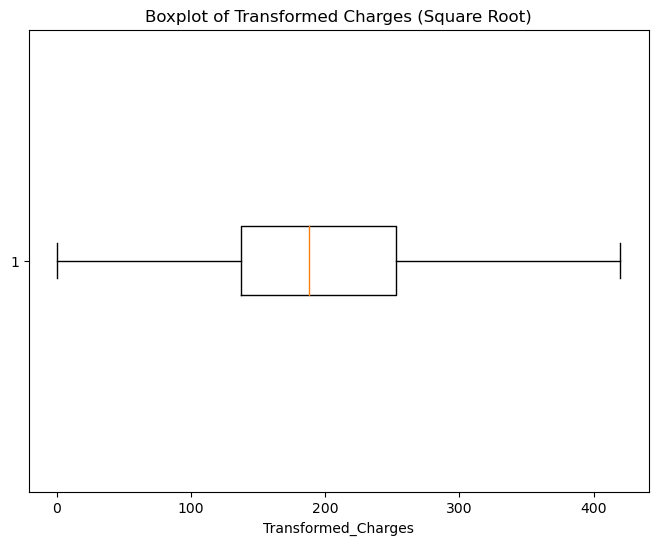

In [106]:
total_charges_data = data['Transformed_Charges']

plt.figure(figsize=(8, 6))
plt.boxplot(total_charges_data, vert=False)  # vert=False to plot horizontally
plt.title('Boxplot of Transformed Charges (Square Root)')
plt.xlabel('Transformed_Charges')
plt.show()

In [107]:
print("data after square_root transform", data.shape)

data after square_root transform (1817493, 21)


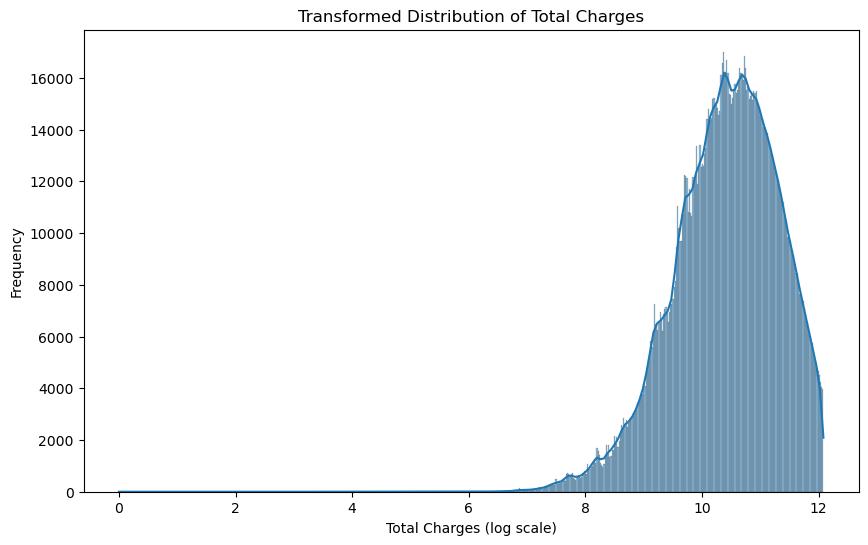

In [108]:
# applying log function to make it normal
import numpy as np

# Apply logarithmic transformation to the right-skewed column
data['log_transform_charges'] = np.log1p(data['Total Charges'])

# Plot the distribution of the transformed column
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['log_transform_charges'], kde=True)
plt.title('Transformed Distribution of Total Charges')
plt.xlabel('Total Charges (log scale)')
plt.ylabel('Frequency')
plt.show()

In [109]:
print("data after log transform", data.shape)

data after log transform (1817493, 22)


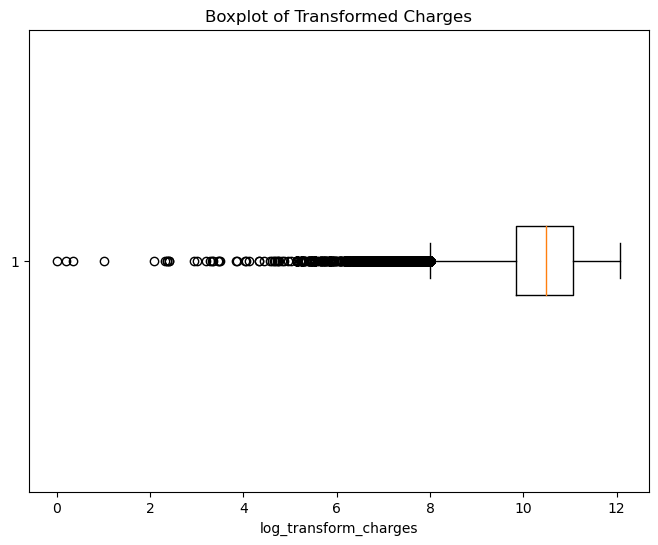

In [110]:
total_charges_data = data['log_transform_charges']

plt.figure(figsize=(8, 6))
plt.boxplot(total_charges_data, vert=False)  # vert=False to plot horizontally
plt.title('Boxplot of Transformed Charges')
plt.xlabel('log_transform_charges')
plt.show()

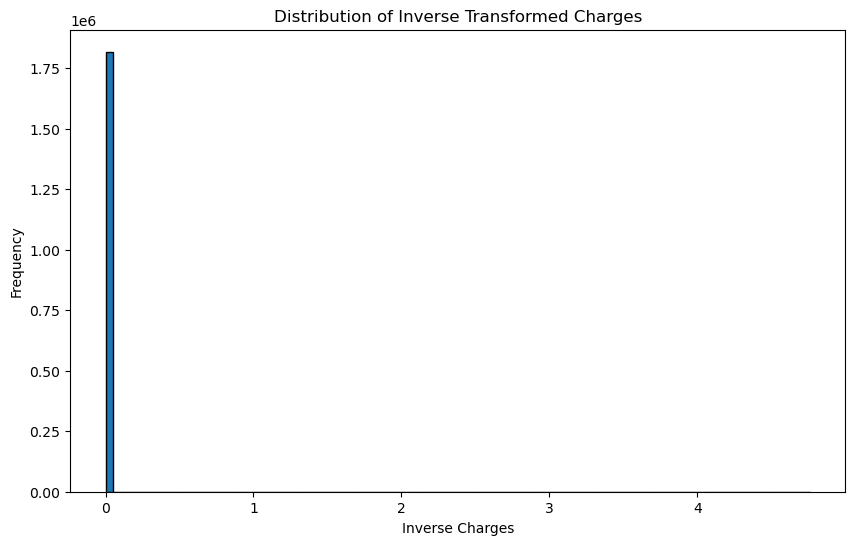

In [111]:
data['Total Charges'] = data['Total Charges'].replace(0, np.nan)  # Optional: replace zeros with NaN
data['Inverse_Charges'] = 1 / data['Total Charges'].dropna()

# Plot the transformed distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Inverse_Charges'], bins=100, edgecolor='black')
plt.xlabel('Inverse Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Inverse Transformed Charges')
plt.show()

In [112]:
print("data after inverse transform", data.shape)

data after inverse transform (1817493, 23)


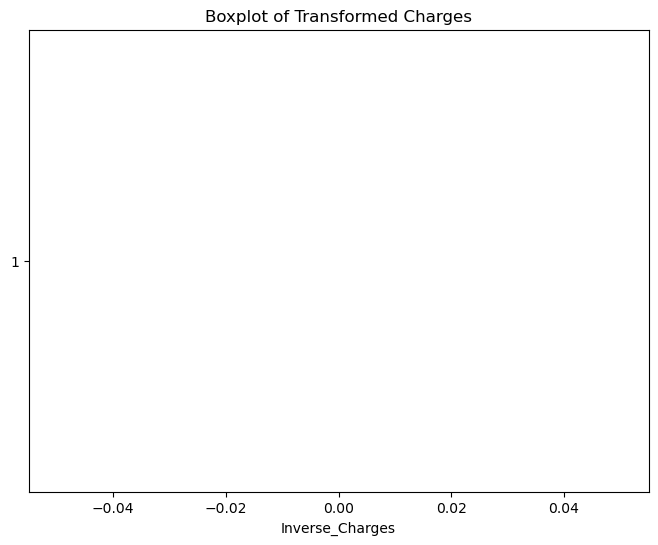

In [113]:
total_charges_data = data['Inverse_Charges']

plt.figure(figsize=(8, 6))
plt.boxplot(total_charges_data, vert=False)  # vert=False to plot horizontally
plt.title('Boxplot of Transformed Charges')
plt.xlabel('Inverse_Charges')
plt.show()

In [114]:
data.columns

Index(['Hospital County', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'APR MDC Code', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'CCSR New ProcCode Category', 'CCSR New DiagCode Category',
       'Transformed_Charges', 'log_transform_charges', 'Inverse_Charges'],
      dtype='object')

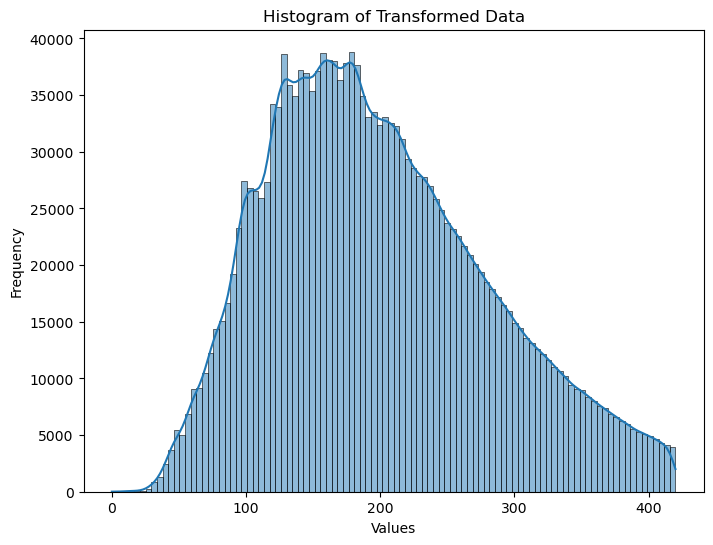

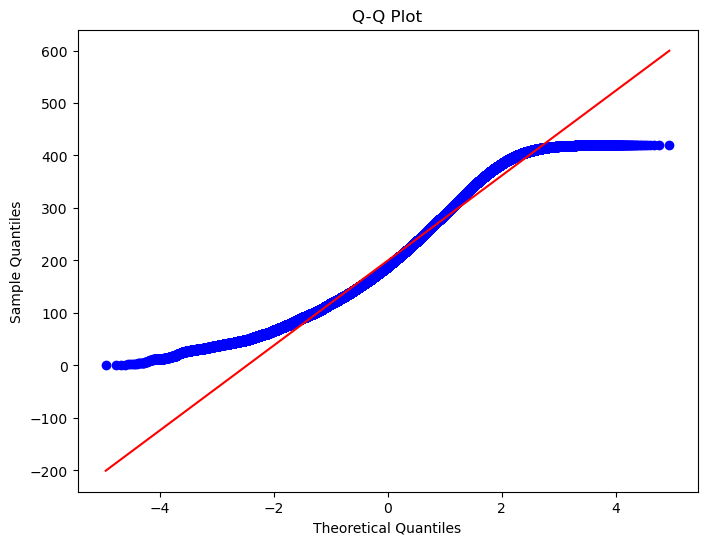

Shapiro-Wilk Test:
Test Statistic: 0.9761735200881958
P-value: 0.0

Kolmogorov-Smirnov Test:
Test Statistic: 0.9999926862464029
P-value: 0.0


In [115]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# transformed data
transformed_data = data['Transformed_Charges']

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(transformed_data, kde=True, bins=100)
plt.title('Histogram of Transformed Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(transformed_data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Shapiro-Wilk Test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(transformed_data)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_test_statistic}")
print(f"P-value: {shapiro_p_value}")

# Kolmogorov-Smirnov Test
ks_test_statistic, ks_p_value = stats.kstest(transformed_data, 'norm')
print("\nKolmogorov-Smirnov Test:")
print(f"Test Statistic: {ks_test_statistic}")
print(f"P-value: {ks_p_value}")

### 7.2 Comparison of Payment Typology Categories

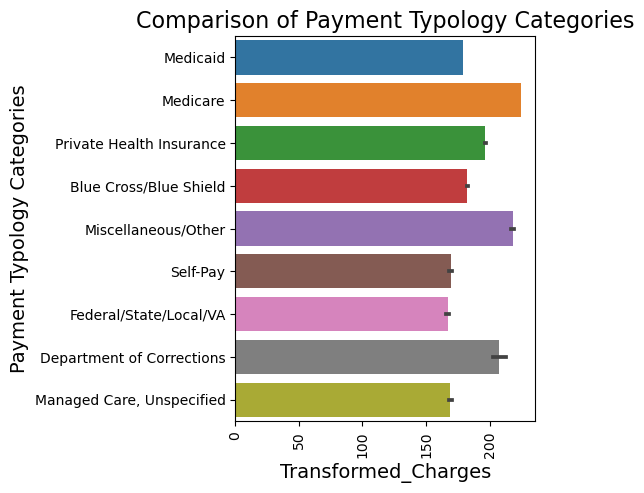

In [108]:
# Sort the data by the total charges in descending order
sorted_data = data.sort_values(by='Transformed_Charges', ascending=False)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the barplot
sns.barplot(x='Transformed_Charges', y='Payment Typology 1', data=sorted_data, ax=ax)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
ax.set_xlabel('Transformed_Charges', fontsize=14)
ax.set_ylabel('Payment Typology Categories', fontsize=14)
ax.set_title('Comparison of Payment Typology Categories', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.3)

# Display the plot
plt.show()

### 7.3 Comparison of Age Group categories

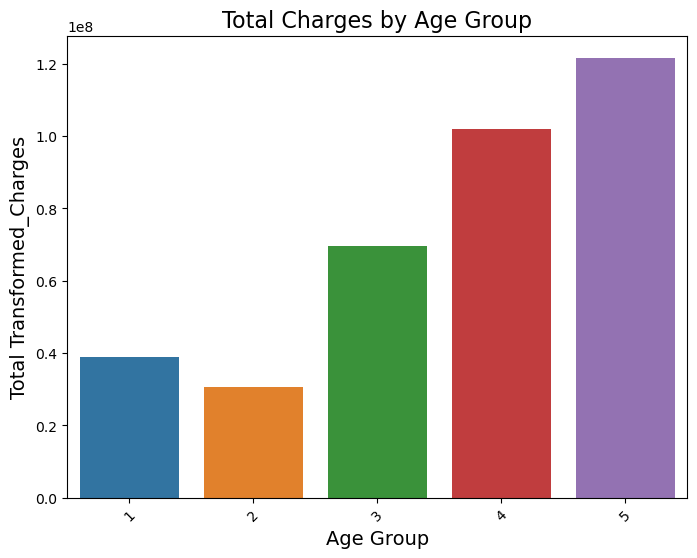

In [109]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar plot
sns.barplot(x='Age Group', y='Transformed_Charges', data=data, estimator=sum, ci=None, ax=ax)

# Add labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Total Transformed_Charges', fontsize=14)
ax.set_title('Total Charges by Age Group', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

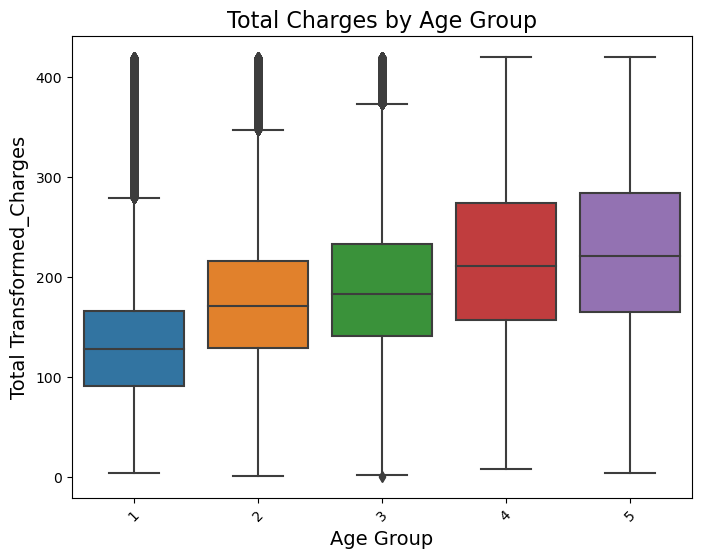

In [110]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the box plot
sns.boxplot(x='Age Group', y='Transformed_Charges', data=data, ax=ax)

# Add labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Total Transformed_Charges', fontsize=14)
ax.set_title('Total Charges by Age Group', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

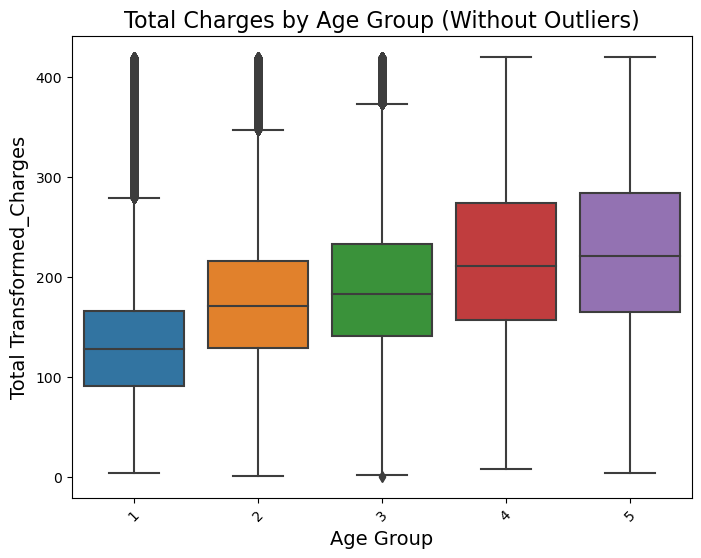

In [111]:
# Calculate the quantiles to define the whiskers
q1 = data['Transformed_Charges'].quantile(0.25)
q3 = data['Transformed_Charges'].quantile(0.75)
iqr = q3 - q1

# Define the upper and lower bounds for the whiskers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Filter the data to remove outliers
filtered_data = data[(data['Transformed_Charges'] >= lower_bound) & (data['Transformed_Charges'] <= upper_bound)]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the box plot with filtered data
sns.boxplot(x='Age Group', y='Transformed_Charges', data=filtered_data, ax=ax)

# Add labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Total Transformed_Charges', fontsize=14)
ax.set_title('Total Charges by Age Group (Without Outliers)', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

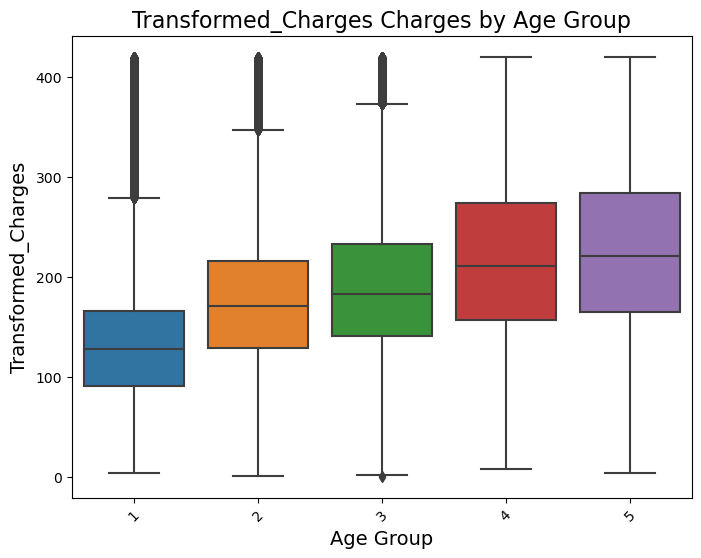

In [112]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the box plot
sns.boxplot(x='Age Group', y='Transformed_Charges', data=data, ax=ax)

# Add labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Transformed_Charges', fontsize=14)
ax.set_title('Transformed_Charges Charges by Age Group', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 7.5. Correlation Matrix for numerical variables

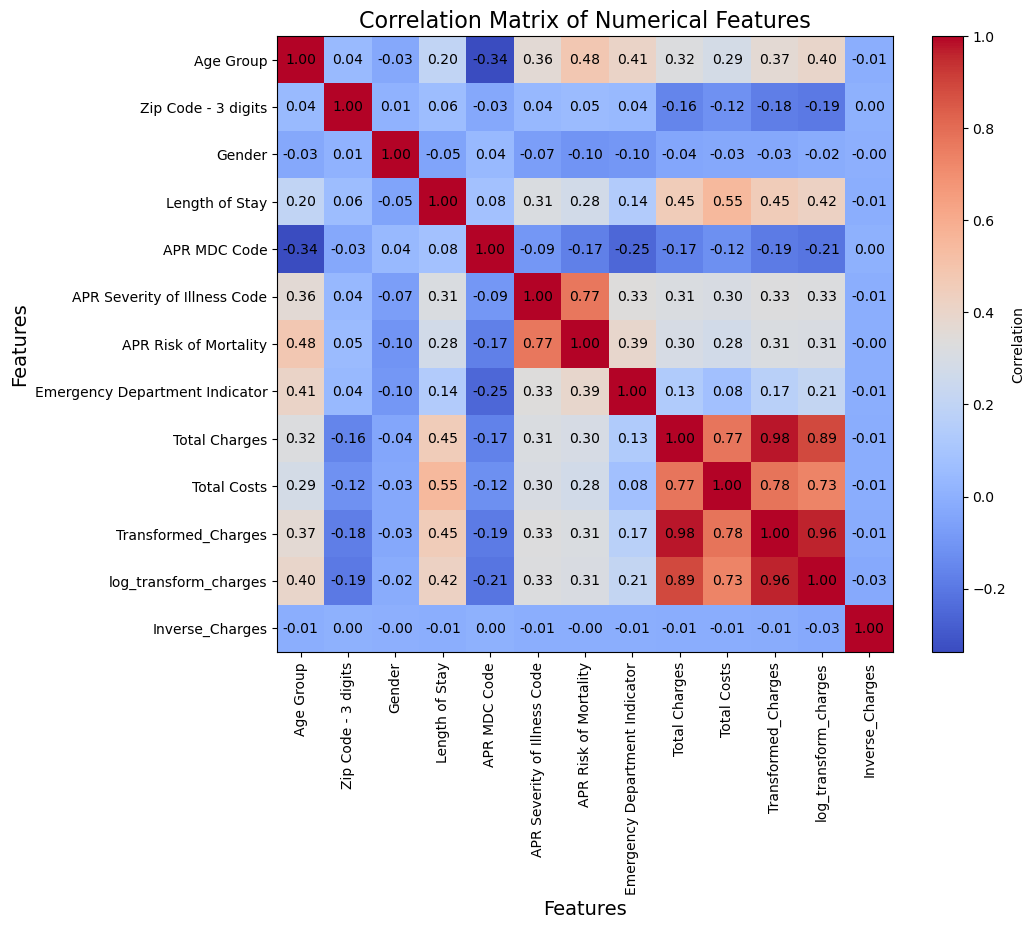

In [113]:
# Select only the numerical columns from the DataFrame
numerical_data = data.select_dtypes(include=['int', 'float'])

# Build the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a figure and axis object
plt.figure(figsize=(10, 8))

# Display the correlation matrix as a matrix plot
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')

# Add labels and title
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(ticks=np.arange(len(correlation_matrix)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix)), labels=correlation_matrix.columns)

# Annotate each cell with its correlation value
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center', color='black')

# Show plot
plt.show()

# Final Data Prep for Modeling

## 8. Dummy Encoding

In [116]:
# 1-hot encoding for multiple columns
# Specifying the list of columns to one-hot encode
columns_to_encode = ['Hospital County','Race', 'Ethnicity','Type of Admission','Patient Disposition',
                     'APR Medical Surgical Description','Payment Typology 1','Payment Typology 2',
                    'CCSR New ProcCode Category','CCSR New DiagCode Category']

# Perform one-hot encoding for multiple columns and ensure numeric encoding instead of boolean
data_encoded = pd.get_dummies(data, columns=columns_to_encode, dtype='int')
print("Data Shape after dummy encoding", data_encoded.shape)
data_encoded.head(1)

Data Shape after dummy encoding (1817493, 173)


,Age Group,Zip Code - 3 digits,Gender,Length of Stay,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Emergency Department Indicator,Total Charges,Total Costs,...,CCSR New DiagCode Category_07 Signs/symptoms and factors influencing health status,CCSR New DiagCode Category_08 Suicidal ideation/attempt/intentional self-harm,CCSR New DiagCode Category_09 Poisoning by drugs or adverse effects of medical drugs,CCSR New DiagCode Category_10 Substance use disorders,CCSR New DiagCode Category_11 Condition XX due to underlying cause YY,CCSR New DiagCode Category_12 Exception to match the CCSR body system to the ICD-10-CM codebook chapter,CCSR New DiagCode Category_12 More than one CCSR category matches the ICD-10-CM codebook chapter,CCSR New DiagCode Category_12 Only one CCSR category matches the ICD-10-CM codebook chapter,CCSR New DiagCode Category_99 Unacceptable PDX,CCSR New DiagCode Category_99 Unacceptable PDX and DX1
0,4,107,2,3,4,3,3,1,51514.62,7552.54,...,0,0,0,0,0,0,0,0,1,0


In [118]:
data_encoded.shape

(1817493, 173)

In [119]:
data.columns

Index(['Hospital County', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'APR MDC Code', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'CCSR New ProcCode Category', 'CCSR New DiagCode Category',
       'Transformed_Charges', 'log_transform_charges', 'Inverse_Charges'],
      dtype='object')

In [120]:
data_encoded.to_csv('data_enceoded.csv', index=False)

## 9. Train, Test and Validation Split

In [121]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_encoded.drop(columns=['Total Charges', 'Transformed_Charges', 'log_transform_charges', 'Inverse_Charges'])  # Adjust 'target_column' with your actual target column name
y = data_encoded['Transformed_Charges']  # Adjust 'target_column' with your actual target column name

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train data into train and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (1090495, 169) (1090495,)
Validation set shape: (363499, 169) (363499,)
Test set shape: (363499, 169) (363499,)


In [122]:
1090495+363499+363499

1817493

In [123]:
1090495/1817493

0.5999995598332428

In [124]:
X_train.head()

,Age Group,Zip Code - 3 digits,Gender,Length of Stay,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Emergency Department Indicator,Total Costs,Hospital County_Albany,...,CCSR New DiagCode Category_07 Signs/symptoms and factors influencing health status,CCSR New DiagCode Category_08 Suicidal ideation/attempt/intentional self-harm,CCSR New DiagCode Category_09 Poisoning by drugs or adverse effects of medical drugs,CCSR New DiagCode Category_10 Substance use disorders,CCSR New DiagCode Category_11 Condition XX due to underlying cause YY,CCSR New DiagCode Category_12 Exception to match the CCSR body system to the ICD-10-CM codebook chapter,CCSR New DiagCode Category_12 More than one CCSR category matches the ICD-10-CM codebook chapter,CCSR New DiagCode Category_12 Only one CCSR category matches the ICD-10-CM codebook chapter,CCSR New DiagCode Category_99 Unacceptable PDX,CCSR New DiagCode Category_99 Unacceptable PDX and DX1
539793,1,149,1,2,15,1,1,0,1323.60,0,...,0,0,0,0,0,0,0,0,0,0
1382982,3,112,1,1,5,4,4,1,11093.51,0,...,0,0,0,0,0,0,0,0,0,0
1789269,1,100,1,2,1,1,1,1,9264.71,0,...,0,1,0,0,0,0,0,0,0,0
1212196,4,113,2,5,6,1,1,1,11276.96,0,...,0,0,0,0,0,0,0,0,1,0
562180,4,0,2,1,7,2,2,1,4018.58,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
X_val.head()

,Age Group,Zip Code - 3 digits,Gender,Length of Stay,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Emergency Department Indicator,Total Costs,Hospital County_Albany,...,CCSR New DiagCode Category_07 Signs/symptoms and factors influencing health status,CCSR New DiagCode Category_08 Suicidal ideation/attempt/intentional self-harm,CCSR New DiagCode Category_09 Poisoning by drugs or adverse effects of medical drugs,CCSR New DiagCode Category_10 Substance use disorders,CCSR New DiagCode Category_11 Condition XX due to underlying cause YY,CCSR New DiagCode Category_12 Exception to match the CCSR body system to the ICD-10-CM codebook chapter,CCSR New DiagCode Category_12 More than one CCSR category matches the ICD-10-CM codebook chapter,CCSR New DiagCode Category_12 Only one CCSR category matches the ICD-10-CM codebook chapter,CCSR New DiagCode Category_99 Unacceptable PDX,CCSR New DiagCode Category_99 Unacceptable PDX and DX1
1022252,4,114,2,11,18,3,4,1,29392.03,0,...,0,0,0,0,1,0,0,0,0,0
1744830,3,129,2,2,14,1,1,0,7491.79,0,...,0,0,0,0,0,0,0,0,0,0
1460731,5,112,2,7,5,2,2,1,21816.28,0,...,0,0,0,0,0,0,0,0,0,0
1421158,5,112,2,6,5,3,3,1,39563.21,0,...,0,0,0,0,0,0,0,0,0,0
1876917,1,112,2,2,6,3,3,1,12622.88,0,...,0,0,0,0,0,0,0,0,0,1


In [126]:
X_test.head()

,Age Group,Zip Code - 3 digits,Gender,Length of Stay,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Emergency Department Indicator,Total Costs,Hospital County_Albany,...,CCSR New DiagCode Category_07 Signs/symptoms and factors influencing health status,CCSR New DiagCode Category_08 Suicidal ideation/attempt/intentional self-harm,CCSR New DiagCode Category_09 Poisoning by drugs or adverse effects of medical drugs,CCSR New DiagCode Category_10 Substance use disorders,CCSR New DiagCode Category_11 Condition XX due to underlying cause YY,CCSR New DiagCode Category_12 Exception to match the CCSR body system to the ICD-10-CM codebook chapter,CCSR New DiagCode Category_12 More than one CCSR category matches the ICD-10-CM codebook chapter,CCSR New DiagCode Category_12 Only one CCSR category matches the ICD-10-CM codebook chapter,CCSR New DiagCode Category_99 Unacceptable PDX,CCSR New DiagCode Category_99 Unacceptable PDX and DX1
671929,5,109,2,1,5,2,2,1,9921.93,0,...,0,0,0,0,0,0,1,0,0,0
1549896,5,147,2,6,18,3,3,1,5360.25,0,...,0,0,0,0,0,0,0,0,0,0
1757208,5,103,2,9,6,3,3,1,30540.74,0,...,0,0,0,0,0,0,0,0,0,0
1953116,4,117,1,1,7,2,2,1,9449.67,0,...,0,0,0,1,0,0,0,0,0,0
802791,5,147,1,3,4,3,3,1,4119.47,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
X_train.shape

(1090495, 169)

In [128]:
def print_shapes(*arrays):
    expected_shapes = ["X_train", "y_train", "X_val", "y_val", "X_test", "y_test"]
    for i, (name, arr) in enumerate(zip(expected_shapes, arrays), 1):
        print(f"Expected shape for {name}: {arr.shape}")
        print(f"Actual shape for {name}: {arr.shape}")

#usage:
print_shapes(X_train, y_train, X_val, y_val, X_test, y_test)

Expected shape for X_train: (1090495, 169)
Actual shape for X_train: (1090495, 169)
Expected shape for y_train: (1090495,)
Actual shape for y_train: (1090495,)
Expected shape for X_val: (363499, 169)
Actual shape for X_val: (363499, 169)
Expected shape for y_val: (363499,)
Actual shape for y_val: (363499,)
Expected shape for X_test: (363499, 169)
Actual shape for X_test: (363499, 169)
Expected shape for y_test: (363499,)
Actual shape for y_test: (363499,)


## Linear Regression

In [126]:
##Linear regression####

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the Linear Regression Model
model = LinearRegression()

# Step 2: Train the Model
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Step 4: Evaluate the Model
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

# Step 5: Print Evaluation Metrics
print("Evaluation for Linear Regression: ")
print("Train Set :")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2) Score:", train_r2)
print("\nValidation Set:")
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print("R-squared (R^2) Score:", val_r2)
print("\nTest Set:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2) Score:", test_r2)

Evaluation for Linear Regression: 
Train Set :
Mean Squared Error (MSE): 1616.0536281829723
Root Mean Squared Error (RMSE): 40.20016950440598
R-squared (R^2) Score: 0.7593232863658076

Validation Set:
Mean Squared Error (MSE): 1617.6616515690644
Root Mean Squared Error (RMSE): 40.220164738213896
R-squared (R^2) Score: 0.7591227680578773

Test Set:
Mean Squared Error (MSE): 1621.5280787170364
Root Mean Squared Error (RMSE): 40.26820183118482
R-squared (R^2) Score: 0.7586097970692673


In [137]:
def plot_actual_vs_predicted(y_train_actual, y_train_pred, y_val_actual, y_val_pred, y_test_actual, y_test_pred, title):
    """
    Plot actual vs predicted values for training, validation, and test sets and display evaluation metrics.

    Parameters:
        y_train_actual (array-like): Array-like object containing the actual values for training set.
        y_train_pred (array-like): Array-like object containing the predicted values for training set.
        y_val_actual (array-like): Array-like object containing the actual values for validation set.
        y_val_pred (array-like): Array-like object containing the predicted values for validation set.
        y_test_actual (array-like): Array-like object containing the actual values for test set.
        y_test_pred (array-like): Array-like object containing the predicted values for test set.
        title (str): Title for the plot.
    """
    # Calculating evaluation metrics for training set
    train_r_squared = r2_score(y_train_actual, y_train_pred)
    train_mse = mean_squared_error(y_train_actual, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    # Calculating evaluation metrics for validation set
    val_r_squared = r2_score(y_val_actual, y_val_pred)
    val_mse = mean_squared_error(y_val_actual, y_val_pred)
    val_rmse = np.sqrt(val_mse)

    # Calculating evaluation metrics for test set
    test_r_squared = r2_score(y_test_actual, y_test_pred)
    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    # Plotting actual vs predicted values for training set
    plt.figure(figsize=(12, 8))
    plt.scatter(y_train_actual, y_train_pred, color='blue', label='Training', alpha=0.5)

    # Plotting actual vs predicted values for validation set
    plt.scatter(y_val_actual, y_val_pred, color='orange', label='Validation', alpha=0.5)

    # Plotting actual vs predicted values for test set
    plt.scatter(y_test_actual, y_test_pred, color='green', label='Test', alpha=0.5)

    # Plotting perfect fit line
    max_val = max(max(y_train_actual), max(y_val_actual), max(y_test_actual))
    plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Fit')

    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.legend()

    # Displaying evaluation metrics on the chart
    plt.text(0.05, 0.85, f'Train R^2: {train_r_squared:.2f}   Train MSE: {train_mse:.2f}   Train RMSE: {train_rmse:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.80, f'Val R^2: {val_r_squared:.2f}   Val MSE: {val_mse:.2f}   Val RMSE: {val_rmse:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.75, f'Test R^2: {test_r_squared:.2f}   Test MSE: {test_mse:.2f}   Test RMSE: {test_rmse:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.show()

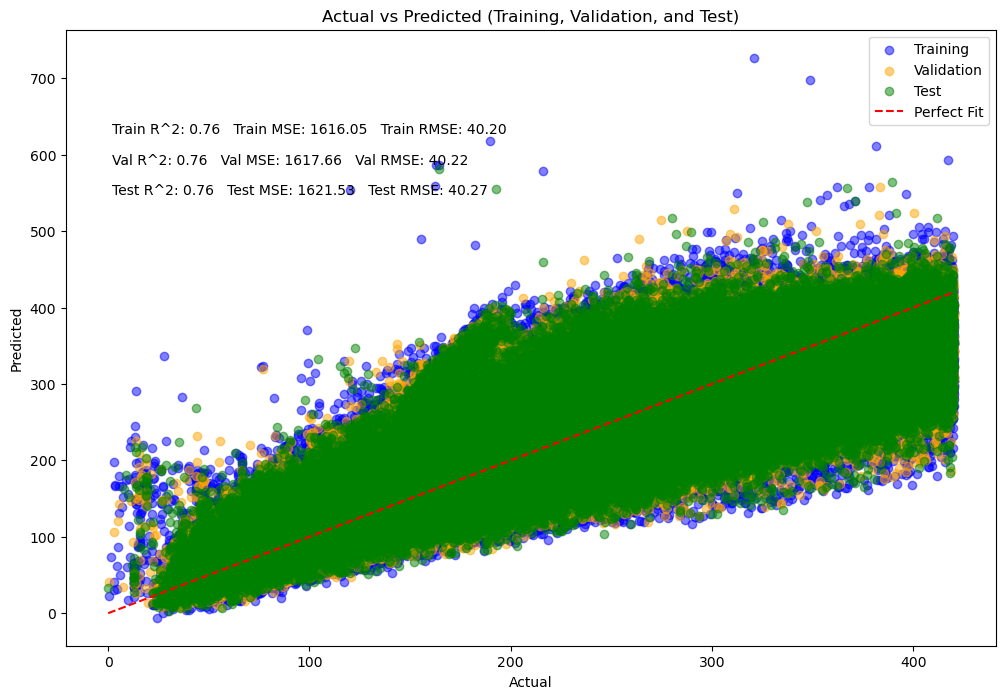

In [138]:
# Call the function with actual and predicted values for all sets
plot_actual_vs_predicted(y_train, y_pred_train, y_val, y_pred_val, y_test, y_pred_test, title='Actual vs Predicted (Training, Validation, and Test)')

In [127]:
####Ridge regression or Hyper parameter tuned regression#####

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model = Ridge()

# Define the parameter grid
parameters = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print results
print("Evaluation for Ridge Regression or hyperparameter tuned linear regression : ")

print("Best Parameters:", best_params)
print("Mean Squared Error (MSE) of Best Fit:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Evaluation for Ridge Regression or hyperparameter tuned linear regression : 
Best Parameters: {'alpha': 1}
Mean Squared Error (MSE) of Best Fit: 1621.5254168382644
Root Mean Squared Error (RMSE): 40.26816877930091
R-squared (R^2) Score: 0.7586101933321907


## Pickle file for Linear regression

In [139]:
import pickle

In [140]:
Pkl_Filename = "Pickle_LR_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(model, file)

In [142]:
with open(Pkl_Filename, 'rb') as file:
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LinearRegression()

## Polynomial Regression

In [143]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_encoded.drop(columns=['Total Charges', 'Transformed_Charges', 'log_transform_charges', 'Inverse_Charges'])  
y = data_encoded['Transformed_Charges']

# Split data into train and test sets (50% train, 50% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Split remaining training data into train and validation sets (50% train, 50% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (454373, 169) (454373,)
Validation set shape: (454373, 169) (454373,)
Test set shape: (908747, 169) (908747,)


In [146]:
from sklearn.decomposition import PCA

# Define the number of components
n_components = 50  # Adjust the number of components as needed

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA on the training data
pca.fit(X_train)

# Transform the training, validation, and test data
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Print the shapes of the transformed datasets
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_val_pca:", X_val_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

Shape of X_train_pca: (454373, 50)
Shape of X_val_pca: (454373, 50)
Shape of X_test_pca: (908747, 50)


In [147]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the degree of the polynomial
degree = 2  # Adjust the degree as needed

# Create a pipeline for polynomial regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the Polynomial Regression Model
poly_model.fit(X_train_pca, y_train)

# Make Predictions
y_pred_train_poly = poly_model.predict(X_train_pca)
y_pred_val_poly = poly_model.predict(X_val_pca)
y_pred_test_poly = poly_model.predict(X_test_pca)

# Print evaluation metrics
train_mse = mean_squared_error(y_train, y_pred_train_poly)
val_mse = mean_squared_error(y_val, y_pred_val_poly)
test_mse = mean_squared_error(y_test, y_pred_test_poly)

train_r2 = r2_score(y_train, y_pred_train_poly)
val_r2 = r2_score(y_val, y_pred_val_poly)
test_r2 = r2_score(y_test, y_pred_test_poly)

print("Train Set:")
print("Mean Squared Error (MSE):", train_mse)
print("R-squared (R^2) Score:", train_r2)
print("\nValidation Set:")
print("Mean Squared Error (MSE):", val_mse)
print("R-squared (R^2) Score:", val_r2)
print("\nTest Set:")
print("Mean Squared Error (MSE):", test_mse)
print("R-squared (R^2) Score:", test_r2)

Train Set:
Mean Squared Error (MSE): 1086.8226879038057
R-squared (R^2) Score: 0.8378609866610095

Validation Set:
Mean Squared Error (MSE): 1098.745770830839
R-squared (R^2) Score: 0.836229464306121

Test Set:
Mean Squared Error (MSE): 1100.2248194496171
R-squared (R^2) Score: 0.8363934593347323


In [148]:
def plot_actual_vs_predicted_poly(y_train_actual, y_train_pred, y_val_actual, y_val_pred, y_test_actual, y_test_pred, title):
    """
    Plot actual vs predicted values for training, validation, and test sets and display evaluation metrics.

    Parameters:
        y_train_actual (array-like): Array-like object containing the actual values for training set.
        y_train_pred (array-like): Array-like object containing the predicted values for training set.
        y_val_actual (array-like): Array-like object containing the actual values for validation set.
        y_val_pred (array-like): Array-like object containing the predicted values for validation set.
        y_test_actual (array-like): Array-like object containing the actual values for test set.
        y_test_pred (array-like): Array-like object containing the predicted values for test set.
        title (str): Title for the plot.
    """
    # Calculating evaluation metrics for training set
    train_r_squared = r2_score(y_train_actual, y_train_pred)
    train_mse = mean_squared_error(y_train_actual, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    # Calculating evaluation metrics for validation set
    val_r_squared = r2_score(y_val_actual, y_val_pred)
    val_mse = mean_squared_error(y_val_actual, y_val_pred)
    val_rmse = np.sqrt(val_mse)

    # Calculating evaluation metrics for test set
    test_r_squared = r2_score(y_test_actual, y_test_pred)
    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    # Plotting actual vs predicted values for training set
    plt.figure(figsize=(12, 8))
    plt.scatter(y_train_actual, y_train_pred, color='blue', label='Training', alpha=0.5)

    # Plotting actual vs predicted values for validation set
    plt.scatter(y_val_actual, y_val_pred, color='orange', label='Validation', alpha=0.5)

    # Plotting actual vs predicted values for test set
    plt.scatter(y_test_actual, y_test_pred, color='green', label='Test', alpha=0.5)

    # Plotting perfect fit line
    max_val = max(max(y_train_actual), max(y_val_actual), max(y_test_actual))
    plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Fit')

    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.legend()

    # Displaying evaluation metrics on the chart
    plt.text(0.05, 0.85, f'Train R^2: {train_r_squared:.2f}   Train MSE: {train_mse:.2f}   Train RMSE: {train_rmse:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.80, f'Val R^2: {val_r_squared:.2f}   Val MSE: {val_mse:.2f}   Val RMSE: {val_rmse:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.75, f'Test R^2: {test_r_squared:.2f}   Test MSE: {test_mse:.2f}   Test RMSE: {test_rmse:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.show

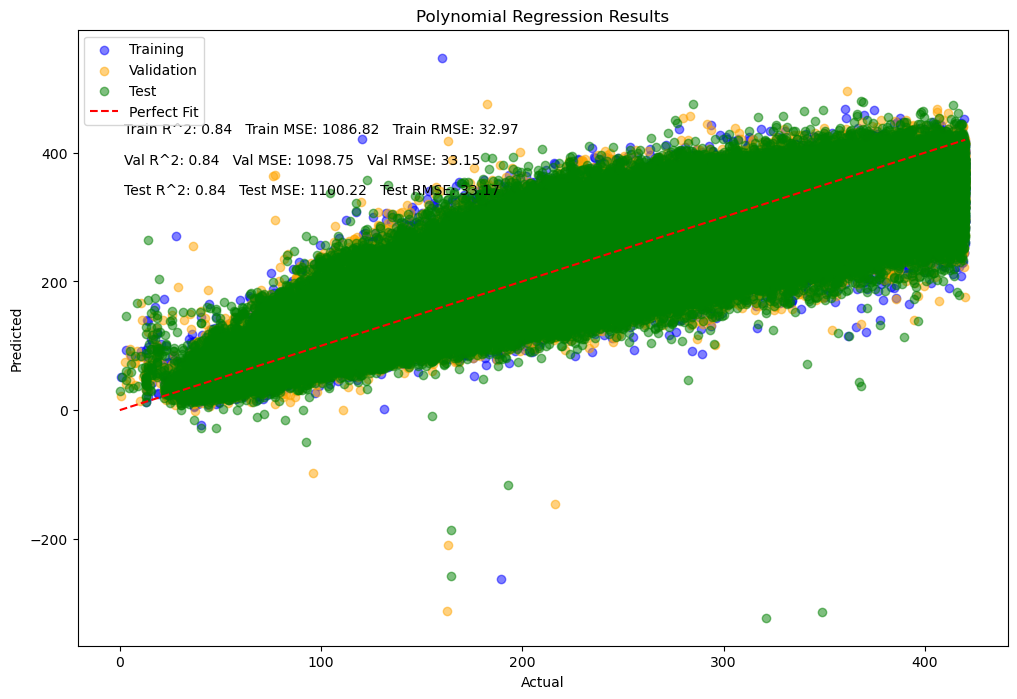

In [149]:
# # Fit the Polynomial Regression Model
# poly_model.fit(X_train_pca, y_train)

# # Make Predictions
# y_pred_train_poly = poly_model.predict(X_train_pca)
# y_pred_val_poly = poly_model.predict(X_val_pca)
# y_pred_test_poly = poly_model.predict(X_test_pca)

# Plot actual vs predicted values for polynomial regression
plot_actual_vs_predicted_poly(y_train, y_pred_train_poly, y_val, y_pred_val_poly, y_test, y_pred_test_poly, title="Polynomial Regression Results")

## creating and loading pickle files for polynomial regression

In [150]:
Pkl_Filename_Poly = "Pickle_Poly_Model.pkl"

with open(Pkl_Filename_Poly, 'wb') as file:
    pickle.dump(poly_model, file)

In [151]:
with open(Pkl_Filename_Poly, 'rb') as file:
    Pickle_Poly_Model = pickle.load(file)

Pickle_Poly_Model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## Random Forest
## Baseline model with n_estimators = 100

In [128]:
#####Random Forest for n_estimaters = 100######

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Initialize the Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Step 2: Train the Model
rf_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_val_rf = rf_model.predict(X_val)
y_pred_test_rf = rf_model.predict(X_test)

import pickle   

# Save the  rf model to a file of nesimatiors=100
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Step 4: Evaluate the Model
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
val_mse_rf = mean_squared_error(y_val, y_pred_val_rf)
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)

train_rmse_rf = np.sqrt(train_mse_rf)
val_rmse_rf = np.sqrt(val_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

train_r2_rf = r2_score(y_train, y_pred_train_rf)
val_r2_rf = r2_score(y_val, y_pred_val_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)


# Step 5: Print Evaluation Metrics

print("Evaluation for Random forest regression with n_estimatoros = 100 : ")

print("Random Forest - Train Set:")
print("Mean Squared Error (MSE):", train_mse_rf)
print("Root Mean Squared Error (RMSE):", train_rmse_rf)
print("R-squared (R^2) Score:", train_r2_rf)

print("\nRandom Forest - Validation Set:")
print("Mean Squared Error (MSE):", val_mse_rf)
print("Root Mean Squared Error (RMSE):", val_rmse_rf)
print("R-squared (R^2) Score:", val_r2_rf)

print("\nRandom Forest - Test Set:")
print("Mean Squared Error (MSE):", test_mse_rf)
print("Root Mean Squared Error (RMSE):", test_rmse_rf)
print("R-squared (R^2) Score:", test_r2_rf)


Evaluation for Random forest regression with n_estimatoros = 100 : 
Random Forest - Train Set:
Mean Squared Error (MSE): 83.94441776289275
Root Mean Squared Error (RMSE): 9.162118628510152
R-squared (R^2) Score: 0.9874982697091403

Random Forest - Validation Set:
Mean Squared Error (MSE): 594.7306317893311
Root Mean Squared Error (RMSE): 24.38709970023765
R-squared (R^2) Score: 0.9114418839083868

Random Forest - Test Set:
Mean Squared Error (MSE): 597.5103670006454
Root Mean Squared Error (RMSE): 24.444025180003504
R-squared (R^2) Score: 0.911051093942437


## Loading pickle file for Random forest baseline model 

In [264]:
# loading the randomforest file with nestimators =100

with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)
    
# Step 3: Make Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_val_rf = rf_model.predict(X_val)
y_pred_test_rf = rf_model.predict(X_test)




# Step 4: Evaluate the Model
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
val_mse_rf = mean_squared_error(y_val, y_pred_val_rf)
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)

train_rmse_rf = np.sqrt(train_mse_rf)
val_rmse_rf = np.sqrt(val_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

train_r2_rf = r2_score(y_train, y_pred_train_rf)
val_r2_rf = r2_score(y_val, y_pred_val_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)


# Step 5: Print Evaluation Metrics

print("Evaluation for Random forest regression with n_estimatoros = 100 : ")

print("Random Forest - Train Set:")
print("Mean Squared Error (MSE):", train_mse_rf)
print("Root Mean Squared Error (RMSE):", train_rmse_rf)
print("R-squared (R^2) Score:", train_r2_rf)

print("\nRandom Forest - Validation Set:")
print("Mean Squared Error (MSE):", val_mse_rf)
print("Root Mean Squared Error (RMSE):", val_rmse_rf)
print("R-squared (R^2) Score:", val_r2_rf)

print("\nRandom Forest - Test Set:")
print("Mean Squared Error (MSE):", test_mse_rf)
print("Root Mean Squared Error (RMSE):", test_rmse_rf)
print("R-squared (R^2) Score:", test_r2_rf)

Evaluation for Random forest regression with n_estimatoros = 100 : 
Random Forest - Train Set:
Mean Squared Error (MSE): 83.94441776289275
Root Mean Squared Error (RMSE): 9.162118628510152
R-squared (R^2) Score: 0.9874982697091403

Random Forest - Validation Set:
Mean Squared Error (MSE): 594.7306317893311
Root Mean Squared Error (RMSE): 24.38709970023765
R-squared (R^2) Score: 0.9114418839083868

Random Forest - Test Set:
Mean Squared Error (MSE): 597.5103670006454
Root Mean Squared Error (RMSE): 24.444025180003504
R-squared (R^2) Score: 0.911051093942437


In [265]:
#######Random Forest with nestimators 10 #######


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Initialize the Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42) 

# Step 2: Train the Model
rf_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_val_rf = rf_model.predict(X_val)
y_pred_test_rf = rf_model.predict(X_test)

# Step 4: Evaluate the Model
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
val_mse_rf = mean_squared_error(y_val, y_pred_val_rf)
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)

train_rmse_rf = np.sqrt(train_mse_rf)
val_rmse_rf = np.sqrt(val_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

train_r2_rf = r2_score(y_train, y_pred_train_rf)
val_r2_rf = r2_score(y_val, y_pred_val_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

# Step 5: Print Evaluation Metrics


print("Evaluation for Random forest regression with n_estimatoros = 10 : ")

print("Random Forest - Train Set:")
print("Mean Squared Error (MSE):", train_mse_rf)
print("Root Mean Squared Error (RMSE):", train_rmse_rf)
print("R-squared (R^2) Score:", train_r2_rf)

print("\nRandom Forest - Validation Set:")
print("Mean Squared Error (MSE):", val_mse_rf)
print("Root Mean Squared Error (RMSE):", val_rmse_rf)
print("R-squared (R^2) Score:", val_r2_rf)

print("\nRandom Forest - Test Set:")
print("Mean Squared Error (MSE):", test_mse_rf)
print("Root Mean Squared Error (RMSE):", test_rmse_rf)
print("R-squared (R^2) Score:", test_r2_rf)



Evaluation for Random forest regression with n_estimatoros = 10 : 
Random Forest - Train Set:
Mean Squared Error (MSE): 118.6110197485897
Root Mean Squared Error (RMSE): 10.890868640681958
R-squared (R^2) Score: 0.9823354188647886

Random Forest - Validation Set:
Mean Squared Error (MSE): 654.1232587331735
Root Mean Squared Error (RMSE): 25.575833490488115
R-squared (R^2) Score: 0.9025980496231842

Random Forest - Test Set:
Mean Squared Error (MSE): 656.0076304478625
Root Mean Squared Error (RMSE): 25.61264590876668
R-squared (R^2) Score: 0.9023428473941634


## Random forest with hyperparameter tuning with Cross validation(CV) = 3 

In [ ]:
#######building hyperparameter tuned rf model 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Define the hyperparameters grid for grid search
param_grid = {
    'n_estimators': [10,30],  # reduced for simplicity
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],   # reduced range
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)

# Train the model
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_rf_model.predict(X_train)
y_pred_val = best_rf_model.predict(X_val)
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse) 

train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Train Set:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2) Score:", train_r2)

print("\nValidation Set:")
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print("R-squared (R^2) Score:", val_r2)

print("\nTest Set:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2) Score:", test_r2)


import pickle   
# Save the trained hyper parameter tuned rf model to a file
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

## Loading Pickle file for ## Random forest with hyperparameter tuning with Cross validation(CV) = 3 

In [134]:
# loading the hyperparameter tuned rf model for CV = 3 

import pickle   

with open('best_rf_model.pkl', 'rb') as file:
    best_rf_model = pickle.load(file)

# after loading the file Make predictions
y_pred_train = best_rf_model.predict(X_train)
y_pred_val = best_rf_model.predict(X_val)
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse) 

train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Train Set:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2) Score:", train_r2)

print("\nValidation Set:")
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print("R-squared (R^2) Score:", val_r2)

print("\nTest Set:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2) Score:", test_r2)

Train Set:
Mean Squared Error (MSE): 270.8346524409707
Root Mean Squared Error (RMSE): 16.457054792427794
R-squared (R^2) Score: 0.9596649560689138

Validation Set:
Mean Squared Error (MSE): 751.8578661537214
Root Mean Squared Error (RMSE): 27.420026735102237
R-squared (R^2) Score: 0.888044918764468

Test Set:
Mean Squared Error (MSE): 753.9975206226294
Root Mean Squared Error (RMSE): 27.459015288655735
R-squared (R^2) Score: 0.88775549624995


## Random forest with hyperparameter tuning with Cross validation(CV) = 5

In [ ]:
# building hyperparameter tuned rf model with CV =5 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Define the hyperparameters grid for grid search
param_grid = {
    'n_estimators': [10,30],  # reduced for simplicity
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],   # reduced range
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Random Forest model with the best hyperparameters
best_rf_model_5 = RandomForestRegressor(**best_params)

# Train the model
best_rf_model_5.fit(X_train, y_train)

# Make predictions
y_pred_train = best_rf_model_5.predict(X_train)
y_pred_val = best_rf_model_5.predict(X_val)
y_pred_test = best_rf_model_5.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse) 

train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Train Set:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2) Score:", train_r2)

print("\nValidation Set:")
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print("R-squared (R^2) Score:", val_r2)

print("\nTest Set:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2) Score:", test_r2)


import pickle   
# Save the trained hyper parameter tuned rf model to a file
with open('best_rf_model_5.pkl', 'wb') as file:
    pickle.dump(best_rf_model_5, file)

## Loading Pickle file Random forest with hyperparameter tuning with Cross validation(CV) = 5

In [133]:
# loading the hyperparameter tuned rf model CV = 5

import pickle   

with open('best_rf_model_5.pkl', 'rb') as file:
    best_rf_model_5 = pickle.load(file)
    

# after loading the file Make predictions
y_pred_train = best_rf_model_5.predict(X_train)
y_pred_val = best_rf_model_5.predict(X_val)
y_pred_test = best_rf_model_5.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse) 

train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Train Set:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2) Score:", train_r2)

print("\nValidation Set:")
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print("R-squared (R^2) Score:", val_r2)

print("\nTest Set:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2) Score:", test_r2)

Train Set:
Mean Squared Error (MSE): 487.88824291704145
Root Mean Squared Error (RMSE): 22.08819238681702
R-squared (R^2) Score: 0.9273394540389972

Validation Set:
Mean Squared Error (MSE): 797.8072700874644
Root Mean Squared Error (RMSE): 28.245482295182434
R-squared (R^2) Score: 0.8812028419814678

Test Set:
Mean Squared Error (MSE): 799.9298890131954
Root Mean Squared Error (RMSE): 28.283031821450745
R-squared (R^2) Score: 0.8809177338501397


## XGBoost

In [130]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                             max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions on each set
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Calculate MSE, RMSE, and R² for each set
train_mse_xgb = mean_squared_error(y_train, y_train_pred)
train_rmse_xgb = np.sqrt(train_mse_xgb)  # Calculating RMSE
train_r2_xgb = r2_score(y_train, y_train_pred)

val_mse_xgb = mean_squared_error(y_val, y_val_pred)
val_rmse_xgb = np.sqrt(val_mse_xgb)  # Calculating RMSE
val_r2_xgb = r2_score(y_val, y_val_pred)

test_mse_xgb = mean_squared_error(y_test, y_test_pred)
test_rmse_xgb = np.sqrt(test_mse_xgb)  # Calculating RMSE
test_r2_xgb = r2_score(y_test, y_test_pred)

# Print the results
print("XGBoost - Train Set:")
print("Mean Squared Error (MSE):", train_mse_xgb)
print("Root Mean Squared Error (RMSE):", train_rmse_xgb)
print("R-squared (R^2) Score:", train_r2_xgb)

print("\nXGBoost - Validation Set:")
print("Mean Squared Error (MSE):", val_mse_xgb)
print("Root Mean Squared Error (RMSE):", val_rmse_xgb)
print("R-squared (R^2) Score:", val_r2_xgb)

print("\nXGBoost - Test Set:")
print("Mean Squared Error (MSE):", test_mse_xgb)
print("Root Mean Squared Error (RMSE):", test_rmse_xgb)
print("R-squared (R^2) Score:", test_r2_xgb)

XGBoost - Train Set:
Mean Squared Error (MSE): 1072.5170413814017
Root Mean Squared Error (RMSE): 32.749305967934674
R-squared (R^2) Score: 0.8402714660363257

XGBoost - Validation Set:
Mean Squared Error (MSE): 1075.464585516861
Root Mean Squared Error (RMSE): 32.79427671891638
R-squared (R^2) Score: 0.8398583955057528

XGBoost - Test Set:
Mean Squared Error (MSE): 1080.254316913756
Root Mean Squared Error (RMSE): 32.86722253117467
R-squared (R^2) Score: 0.8391869914562757


In [132]:
import pickle

# Save the model and predictions to a pickle file, including RMSE
model_data = {
    'model': xgb_model,
    'y_train_pred': y_train_pred,
    'y_val_pred': y_val_pred,
    'y_test_pred': y_test_pred,
    'train_mse': train_mse_xgb,
    'train_rmse': train_rmse_xgb,
    'train_r2': train_r2_xgb,
    'val_mse': val_mse_xgb,
    'val_rmse': val_rmse_xgb,
    'val_r2': val_r2_xgb,
    'test_mse': test_mse_xgb,
    'test_rmse': test_rmse_xgb,
    'test_r2': test_r2_xgb
}

with open('xgb_model_data.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Model and predictions, including RMSE, saved to 'xgb_model_data.pkl'")

Model and predictions, including RMSE, saved to 'xgb_model_data.pkl'


## Loading pickle file for XG Boost for base model

In [133]:
import pickle

# Load the model and data from the pickle file
with open('xgb_model_data.pkl', 'rb') as file:
    data_loaded = pickle.load(file)

# Accessing the loaded data
loaded_model = data_loaded['model']
loaded_y_train_pred = data_loaded['y_train_pred']
loaded_y_val_pred = data_loaded['y_val_pred']
loaded_y_test_pred = data_loaded['y_test_pred']
loaded_train_mse = data_loaded['train_mse']
loaded_train_rmse = data_loaded['train_rmse']  # Loading RMSE
loaded_train_r2 = data_loaded['train_r2']
loaded_val_mse = data_loaded['val_mse']
loaded_val_rmse = data_loaded['val_rmse']  # Loading RMSE
loaded_val_r2 = data_loaded['val_r2']
loaded_test_mse = data_loaded['test_mse']
loaded_test_rmse = data_loaded['test_rmse']  # Loading RMSE
loaded_test_r2 = data_loaded['test_r2']

# Print the results
print("Loaded XGBoost - Train Set:")
print("Mean Squared Error (MSE):", loaded_train_mse)
print("Root Mean Squared Error (RMSE):", loaded_train_rmse)
print("R-squared (R^2) Score:", loaded_train_r2)

print("\nLoaded XGBoost - Validation Set:")
print("Mean Squared Error (MSE):", loaded_val_mse)
print("Root Mean Squared Error (RMSE):", loaded_val_rmse)
print("R-squared (R^2) Score:", loaded_val_r2)

print("\nLoaded XGBoost - Test Set:")
print("Mean Squared Error (MSE):", loaded_test_mse)
print("Root Mean Squared Error (RMSE):", loaded_test_rmse)
print("R-squared (R^2) Score:", loaded_test_r2)


Loaded XGBoost - Train Set:
Mean Squared Error (MSE): 1072.5170413814017
Root Mean Squared Error (RMSE): 32.749305967934674
R-squared (R^2) Score: 0.8402714660363257

Loaded XGBoost - Validation Set:
Mean Squared Error (MSE): 1075.464585516861
Root Mean Squared Error (RMSE): 32.79427671891638
R-squared (R^2) Score: 0.8398583955057528

Loaded XGBoost - Test Set:
Mean Squared Error (MSE): 1080.254316913756
Root Mean Squared Error (RMSE): 32.86722253117467
R-squared (R^2) Score: 0.8391869914562757


###XGBoost

###Without parameter tuning:

### With Hyperparameter tuning:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb


# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                             max_depth = 5, alpha = 10, n_estimators = 100)

# Define hyperparameter distribution
param_dist = {
    'max_depth': np.arange(3, 8),
    'learning_rate': np.logspace(-2, -0.5, num=4),
    'n_estimators': [50, 100, 200],
    'colsample_bytree': np.linspace(0.3, 1, num=3),
    'subsample': [0.7, 1],
    'alpha': [0, 10, 100]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best estimator
best_xgb = random_search.best_estimator_

# Predictions on train, validation, and test sets using the best estimator
y_train_pred = best_xgb.predict(X_train)
y_val_pred = best_xgb.predict(X_val)
y_test_pred = best_xgb.predict(X_test)

# Evaluate the model
train_mse_xgb = mean_squared_error(y_train, y_train_pred)
train_r2_xgb = r2_score(y_train, y_train_pred)

val_mse_xgb = mean_squared_error(y_val, y_val_pred)
val_r2_xgb = r2_score(y_val, y_val_pred)

test_mse_xgb = mean_squared_error(y_test, y_test_pred)
test_r2_xgb = r2_score(y_test, y_test_pred)

# Print the results
print("XGBoost - Train Set:")
print("Mean Squared Error (MSE):", train_mse_xgb)
print("R-squared (R^2) Score:", train_r2_xgb)
print("\nXGBoost - Validation Set:")
print("Mean Squared Error (MSE):", val_mse_xgb)
print("R-squared (R^2) Score:", val_r2_xgb)
print("\nXGBoost - Test Set:")
print("Mean Squared Error (MSE):", test_mse_xgb)
print("R-squared (R^2) Score:", test_r2_xgb)

## loading with pickle for XGBoost hyperparameter tuned 

In [135]:
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Load the model and results from the pickle file
with open('xgb_model_results_hyperparameter.pkl', 'rb') as file:
    data_loaded = pickle.load(file)

# Extract the best model and predictions
best_xgb = data_loaded['best_model']
y_train_pred = data_loaded['y_train_pred']
y_val_pred = data_loaded['y_val_pred']
y_test_pred = data_loaded['y_test_pred']
train_mse = data_loaded['train_mse']
train_rmse = data_loaded['train_rmse']  # Load RMSE
train_r2 = data_loaded['train_r2']
val_mse = data_loaded['val_mse']
val_rmse = data_loaded['val_rmse']  # Load RMSE
val_r2 = data_loaded['val_r2']
test_mse = data_loaded['test_mse']
test_rmse = data_loaded['test_rmse']  # Load RMSE
test_r2 = data_loaded['test_r2']

# Print the results loaded from the pickle file
print("Loaded XGBoost - Train Set:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2) Score:", train_r2)

print("\nLoaded XGBoost - Validation Set:")
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print("R-squared (R^2) Score:", val_r2)

print("\nLoaded XGBoost - Test Set:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2) Score:", test_r2)

# Optionally, you can use the loaded model to make new predictions
# For example, if you have new data:
# X_new = ... # your new dataset
# y_new_pred = best_xgb.predict(X_new)

# Use the model for further predictions or evaluations as needed


Loaded XGBoost - Train Set:
Mean Squared Error (MSE): 670.2772397910833
Root Mean Squared Error (RMSE): 25.889713010983403
R-squared (R^2) Score: 0.9001765037475288

Loaded XGBoost - Validation Set:
Mean Squared Error (MSE): 685.8776699411809
Root Mean Squared Error (RMSE): 26.189266311624326
R-squared (R^2) Score: 0.897869672297606

Loaded XGBoost - Test Set:
Mean Squared Error (MSE): 689.4711581248476
Root Mean Squared Error (RMSE): 26.25778281052777
R-squared (R^2) Score: 0.8973612699285936


## Gradient Boosting Regression 

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor()

# Step 2: Train the Model
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Step 4: Evaluate the Model
train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

# Step 5: Print Evaluation Metrics
print("Evaluation for Gradient Boosting Regressor: ")
print("Train Set :")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R^2) Score:", train_r2)
print("\nValidation Set:")
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print("R-squared (R^2) Score:", val_r2)
print("\nTest Set:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R^2) Score:", test_r2)

Evaluation for Gradient Boosting Regressor: 
Train Set :
Mean Squared Error (MSE): 1224.8352307994562
Root Mean Squared Error (RMSE): 34.99764607512134
R-squared (R^2) Score: 0.8175869210332826

Validation Set:
Mean Squared Error (MSE): 1223.9091273629397
Root Mean Squared Error (RMSE): 34.9844126342424
R-squared (R^2) Score: 0.8177543230613591

Test Set:
Mean Squared Error (MSE): 1232.253829996663
Root Mean Squared Error (RMSE): 35.10347318993753
R-squared (R^2) Score: 0.8165594503177431
